<a href="https://colab.research.google.com/github/Pauladrea03/supervised-and-unsupervised-learning-project/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUARTA ENTREGA: DEEP LEARNING**


**Autores**
- Isabela Pareja Gil
- Juliana Rueda Arango
- Paula Andrea Ortega Sanjuan
- José David Martínez Espinosa


**Planteamiento del problema**

<p align="justify">La educación, como pilar del desarrollo humano y social, enfrenta desafíos constantes en su búsqueda por brindar oportunidades equitativas y garantizar la permanencia de los estudiantes. En este contexto, la deserción emerge como un desafío continuo para las instituciones educativas en todo el mundo. Según Tinto (1982) y Giovagnoli (2002), la deserción estudiantil se define como la situación en la que un estudiante no culmina su proyecto educativo. Generalmente, se da por motivos socioeconómicos, individuales, institucionales o académicos (Ministerio de Educación Nacional, 2009). Según el Banco Mundial (2015), para el año 2015 Colombia presentó una tasa de deserción académica del 42%. El Sistema para la Prevención y Análisis de la Deserción en las Instituciones de Educación Superior (SPADIES) en el año 2021, reveló una tasa de 25,47% para el nivel universitario. Esta cifra refleja la magnitud del desafío que enfrenta Colombia en términos de deserción educativa.

<p align="justify">La Universidad de Antioquia (UdeA), reconocida como una de las IES más prominentes en Colombia, se caracteriza por ser diversa y reunir estudiantes de diferentes estratos sociales y regiones del país. A pesar de los esfuerzos institucionales por ofrecer oportunidades educativas de calidad, la realidad refleja que una parte considerable de la población estudiantil no logra completar su proyecto educativo. En la cohorte 2017-2021, la UdeA enfrentó una tasa de deserción del 27,68%, lo que subraya la urgencia de abordar este problema de manera integral y efectiva (Universidad de Antioquia, 2022). Los estudiantes de pregrado de la facultad de ingeniería representan el 24,47% del total de matriculados para el semestre 2023-2, evidenciando que es esta facultad la que más estudiantes alberga en sus programas académicos dentro de la universidad. La tasa de deserción indicada para el 2023 fue del 30.96%, según Vicerrectoría de Docencia (2024), la cuál ha tendido a disminuir con el tiempo.

**Solución propuesta**

<p align="justify">Se desarrolla una herramienta basada en algoritmos de Machine Learning para identificar a los estudiantes con riesgo de deserción en la institución educativa, así como sus características comunes. Esta herramienta permite clasificar automáticamente a los estudiantes en cuatro grupos, según el momento en que tienden a abandonar sus estudios universitarios. Este enfoque proporciona a la institución la capacidad de predecir y analizar, semestre a semestre, cuáles estudiantes tienen mayor probabilidad de desertar, ofreciendo una visión más clara de esta problemática. Lo anterior ofrece a la universidad la oportunidad de identificar a tiempo los grupos de estudiantes con una posibilidad de desertar, para así elaborar estrategias adecuadas para la permanencia, de la mano de Bienestar Universitario y otras dependencias.

<p align="*justify*">Se utilizarán las redes neuronales para la creación de diferentes modelos, pues estas son muy flexibles y tienen una alta capacidad de aprendizaje, lo que las hace idóneas para este tipo de ejercicios robustos. Por otro lado, se creará un modelo de árboles de decisión para ser comparado con las redes neuronales, e identificar así el tipo de algoritmo más adecuado para esta problemática.

#**Librerías**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import sklearn.metrics as metrics

# Estadística
from scipy.stats import median_abs_deviation, gaussian_kde, stats

# Preprocesamiento y escalado
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Modelado y selección de características
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

# Deep Learning
from tensorflow.keras import regularizers
from tensorflow import keras
from keras.models import Sequential

# Optimización de hiperparámetros
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import RandomizedSearchCV
import time

# Evaluación - Métricas
from sklearn.metrics import accuracy_score, precision_score



#***Carga de bases de datos***

<p align="justify">Se dispone de dos bases de datos que recopilan información sobre estudiantes que han desertado. La primera, en formato CSV, abarca las cohortes desde 2010-1 hasta 2018-1; la segunda, en formato Excel, contiene datos de desertores desde 2018-2 hasta 2023-2. Ambas bases de datos fueron sometidas a un proceso de preprocesamiento detallado, con el propósito de garantizar su calidad y adecuación para los análisis requeridos en el proyecto.


In [ ]:
#carga de datos desde google drive
file_id="1MogTo4boVdftrasQvpOLhR8eJ68VR4EY"
df = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id}',encoding='latin-1', delimiter=";")
df=pd.DataFrame(df)
df.head()
df.shape

(11379, 89)

In [ ]:
#carga de datos desde google drive
file_id="1j7T807Q0nYbJmAs0f6HqIEIqiSOwFQ2s"
df2 = pd.read_excel(f'https://docs.google.com/uc?export=download&id={file_id}')
df2=pd.DataFrame(df2)
df2.head(2)
df2.shape

(20310, 51)

#**Limpieza y transformación de bases de datos**

<p align="justify">Inicialmente se realizó el cambio de nombres, filtro y eliminación de variables con respecto al objeto de estudio, en ambas bases de datos, esto con la finalidad de tener un mayor entendimiento de qué información proporciona cada variable.

<p align="justify">Nuestro campo de estudio serán los estudiantes desertores de la sede Medellín, en modalidad presencial que fueron aceptados por examen, negritud o indigenas.

##Base de datos 1 (df)

<p align="justify">La base de datos original contaba con 89 variables, de las cuales, tras un análisis exhaustivo, se seleccionaron 30 como finales. Las 59 variables eliminadas incluían en su mayoría datos redundantes que, aunque presentaban nombres diferentes, duplicaban información ya existente. Otras variables fueron consideradas irrelevantes para los objetivos del proyecto y, tras un análisis detallado por parte del equipo, se decidió descartarlas. Entre las variables eliminadas se encuentran: el nombre del colegio, el código del ICFES del colegio, la carrera de segunda opción, y el puesto obtenido en la segunda opción según el examen de admisión, entre otras.

<p align="justify"> Como parte del preprocesamiento, el nombre de algunas variables fueron cambiadas para un mejor entendimiento. También se realizó el filtro al objeto de estudio.

In [ ]:
# Hay dos estratos en la base de datos pero son diferentes datos, primero se modifica los estratos debido a que uno estaba en mayuscula y otro no
df.rename(columns={
    "ESTRATO":"estrato_1",
    "Estrato":"estrato_2"
},inplace=True)
# Convertir todos los titulos de las columnas en minusculas
df.columns=df.columns.str.lower()

In [ ]:
# Eliminar aquellas columnas que no son de interes para los resultados que se quieren obtener
labels=["estu_genero",'estu_nacimiento_mes','estu_nacimiento_dia','colegio', 'nombre_cole','municipio_col', 'ind_pobreza_col','tipo_aceptacion','tipo_programa',
        'version','creditos_ultim_semest_matric',"ultimo_prog","nom_ultimo_prog", 'credaprobados','tipodocto_anterior', 'docto_anterior','sede_presencialidad','cole_cod_icfes','municipio_nace',
        'prog_admitido', 'tipo_de_documento_udea','tipoinscrip',"municipio reside", "estrato_2", 'nombre colegio','departamento col', 'municipio_col', 'nat col', 'año titulo','prog prim opcion',
        'nombre programa prim opcion', 'sede programa po','puesto po', 'prog segu opcion', 'nombre programa segu opcion','sede programa so', 'puesto so', 'nombre programa admi',
        'sede programa ad', 'llamado','lugar pres(virtuales)', 'área', 'nombre area', 'prueba1 bruta','puntaje1', 'prueba2 bruta', 'puntaje2', 'prueba3_bruta',
        'puntaje3','prueba1_estan', 'puntaje1_s', 'prueba2_estan','puntaje2_s', 'prueba3 estan', 'puntaje3_s',"estado"]
df.drop(labels,axis=1,inplace=True)

# Cambiar los nombres de algunas variables para mejor entendimiento
df.rename(columns={
    "codigo_ id":"cedula",
    "estu_nacimiento_anno":"ano_nacimiento",
    "pais_nace":"pais_nacimiento",
    "departamento_nace":"departamento_nacimiento",
    "nombre_muni_nace":"municipio_nacimiento",
    "nombre_muni_vive":"municipio_vive",
    "semet":"semestre_admision_programa",
    "credgrado":"cred_grado",
    "numsemestres":"num_semestres",
    "tipoaceptacion":"tipo_aceptacion",
    "estrato_1":"estrato",
    "sexo":"estu_genero",
    "estado2":"estado"
},inplace=True)

In [ ]:
# Aplicar filtro a sede, tipo de aceptacion y modalidad
df_1=df[(df["sede"]=="MEDELLIN") &
           (df["modalidad"]=="PRESENCIAL") &
           (df["tipo_aceptacion"].isin(["POR-EXAM","INDIGENA","NEGRITUD"]))]

In [ ]:
df_1.drop("modalidad",axis=1,inplace=True)

<ipython-input-8-e7e85346c250>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop("modalidad",axis=1,inplace=True)


In [ ]:
df_puntajes=df_1[["cod_programa","programa","puntaje_total_bruta","puntaje_total_estan"]]
df_filt=df_1[['cedula', 'estu_genero', 'ano_nacimiento', 'pais_nacimiento',
       'departamento_nacimiento', 'municipio_nacimiento', 'departamento_vive',
       'municipio_vive', 'ind_pobreza', 'estrato', 'naturaleza_cole', 'sede',
       'cod_programa', 'programa', 'estado','semestre_inicia_programa', 'ultimo_semestre_terminado',
       'promedio_ultimo_semestre_terminado', 'ultimo_semestre_matriculado',
       'nivel_pregrado', 'promedio_programa', 'rango', 'tercio',
       'periodos_prueba_programa', 'cred_curs_prog', 'cred_aprob_prog',
       'cred_grado', 'num_semestres', 'semestre_admision_programa',
       'tipo_aceptacion']]

Las variables 'cod_programa', 'puntaje_total_bruta' y 'puntaje_total_estan' se filtran de la base de datos 1 ya que la base de datos 2 no contiene estas variables, lo cupal dificultaría la unión de ambos datasets.

##Base de datos 2 (df2)

La base de datos original constaba de 51 variables, de las cuales se eliminaron 21, quedando un total de 30 variables finales. La mayoría de las variables eliminadas se consideraron irrelevantes para los objetivos del proyecto y, tras un análisis exhaustivo, el equipo decidió descartarlas. Además, algunas variables no coincidían con las de la primera base de datos, lo que hacía indispensable su eliminación para garantizar un ensamble adecuado. Entre las variables eliminadas se incluyen los nombres y apellidos de los estudiantes, el código del país, departamento y municipio, así como algunos datos sobre créditos universitarios e información del colegio, entre otras.

In [ ]:
#convertir todos los titulos de las columnas en minusculas
df2.columns=df2.columns.str.lower()

In [ ]:
#eliminar aquellas columnas que no son de nuestro interes para los resultados que queremos obtener
labels=['primer_apellido', 'segundo_apellido', 'nombres','tipo_programa','version','cod_pais', 'cod_depto_nace','cod_muni_nace','cod_pais_vive', 'pais_vive',
        'cod_depto_vive','cod_muni_vive','creditos_ultim_semest_matric','creditos_validos_udea','creditos_cursados_udea', 'creditos_aprobados_udea','promedio_universidad',
        'colegio', 'nombre_cole','ultimo_prog', 'nom_ultimo_prog','credaprobados']
df2.drop(labels,axis=1,inplace=True)

#cambiar los nombres de algunas variables para mejor entendimiento
df2.rename(columns={
    "año nac":"ano_nacimiento",
    "pais_nace":"pais_nacimiento",
    "departamento_nace":"departamento_nacimiento",
    "nombre_muni_nace":"municipio_nacimiento",
    "nombre_muni_vive":"municipio_vive",
    "semet":"semestre_admision_programa",
    "credgrado":"cred_grado",
    "numsemestres":"num_semestres",
    "tipoaceptacion":"tipo_aceptacion",
    "promedio_semestre":"promedio_ultimo_semestre_terminado",
    "sexo":"estu_genero"
},inplace=True)
#falta ind_pobreza

In [ ]:
#aplicar filtro a sede, tipo de aceptacion, estado y programa
df2_filt=df2[(df2["sede"]=="MEDELLIN") &
             (df2["tipo_aceptacion"].isin(["POR-EXAM","INDIGENA","NEGRITUD"])) &
             (df2['sede_presencialidad'].isna() | (df2['sede_presencialidad'] == 'Medellín')) &
             (df2["estado"]=="DESERTOR") &
             (df2["programa"].isin(["INGENIERÍA CIVIL","INGENIERÍA INDUSTRIAL","INGENIERÍA DE SISTEMAS","INGENIERÍA AMBIENTAL","INGENIERÍA ELECTRÓNICA","INGENIERÍA MECÁNICA","BIOINGENIERÍA","INGENIERÍA QUÍMICA","INGENIERÍA ELÉCTRICA","ING TELECOMUNICACIONES","INGENIERÍA SANITARIA","INGENIERÍA DE MATERIALES"]))]

In [ ]:
df2_filt.drop("sede_presencialidad",axis=1,inplace=True)

<ipython-input-13-a01c202fe481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filt.drop("sede_presencialidad",axis=1,inplace=True)


In [ ]:
# REDEFINICION DE TIPOS DE DATOS
# Reemplazar las comas por puntos y convertir algunas columnas a tipo de datos float o categóricas para su operacion
df_filt.loc[:,"promedio_ultimo_semestre_terminado"]=df_filt["promedio_ultimo_semestre_terminado"].str.replace(",",".")
df_filt.loc[:,"promedio_programa"]=df_filt["promedio_programa"].str.replace(",",".")
df_puntajes.loc[:,"puntaje_total_bruta"]=df_puntajes["puntaje_total_bruta"].str.replace(",",".")
df_puntajes.loc[:,"puntaje_total_estan"]=df_puntajes["puntaje_total_estan"].str.replace(",",".")
df_filt.loc[:,"ind_pobreza"]=df_filt["ind_pobreza"].str.replace(",",".")
df_filt["ind_pobreza"]=df_filt["ind_pobreza"].astype("object")
df_filt["promedio_ultimo_semestre_terminado"]=df_filt["promedio_ultimo_semestre_terminado"].astype("float")
df_filt["promedio_programa"]=df_filt["promedio_programa"].astype("float")
df_puntajes["puntaje_total_bruta"]=df_puntajes["puntaje_total_bruta"].astype("float")
df_puntajes["puntaje_total_estan"]=df_puntajes["puntaje_total_estan"].astype("float")
df_filt["num_semestres"]=df_filt["num_semestres"].astype("float")

<ipython-input-14-dce6194fe939>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["ind_pobreza"]=df_filt["ind_pobreza"].astype("object")
<ipython-input-14-dce6194fe939>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt["promedio_ultimo_semestre_terminado"]=df_filt["promedio_ultimo_semestre_terminado"].astype("float")
<ipython-input-14-dce6194fe939>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

##Unión de bases de datos 1 y 2

In [ ]:
# Unión de las dos bases
df_final=pd.merge(df_filt,df2_filt,on=['cedula','estu_genero', 'sede', 'cod_programa', 'programa', 'estado',
       'ano_nacimiento', 'pais_nacimiento', 'departamento_nacimiento',
       'municipio_nacimiento', 'departamento_vive', 'municipio_vive',
       'ultimo_semestre_matriculado', 'estrato', 'semestre_inicia_programa',
       'ultimo_semestre_terminado', 'cred_curs_prog', 'cred_aprob_prog',
       'promedio_ultimo_semestre_terminado', 'promedio_programa', 'rango',
       'tercio', 'periodos_prueba_programa', 'nivel_pregrado',
       'tipo_aceptacion', 'naturaleza_cole', 'cred_grado', 'num_semestres'],how='outer')
df_final

cedula estu_genero  ano_nacimiento pais_nacimiento  \
0           168116        MASC            1985            CUBA   
1           399658        FEME            2002          TAIWAN   
2           447401        MASC            2004            PERU   
3           598360        MASC            1999            PERU   
4           767408        MASC            2002            PERU   
...            ...         ...             ...             ...   
10693  41717975263        MASC            1999        COLOMBIA   
10694  41718018950        FEME            1999        COLOMBIA   
10695  41718098869        MASC            1999        COLOMBIA   
10696  41718183816        MASC            1999        COLOMBIA   
10697  41718396013        MASC            1999        COLOMBIA   

      departamento_nacimiento municipio_nacimiento departamento_vive  \
0                   LA HABANA            LA HABANA         ANTIOQUIA   
1                 DESCONOCIDO          DESCONOCIDO         ANTIOQUIA   
2                        LIMA                 LIMA         ANTIOQUIA   
3                        LIMA           MIRAFLORES         ANTIOQUIA   
4                        LIMA                 LIMA         ANTIOQUIA   
...                       ...                  ...               ...   
10693               ANTIOQUIA           COPACABANA         ANTIOQUIA   
10694               ANTIOQUIA               AMALFI         ANTIOQUIA   
10695               ANTIOQUIA             MEDELLIN         ANTIOQUIA   
10696               ANTIOQUIA             MEDELLIN         ANTIOQUIA   
10697               ANTIOQUIA             MEDELLIN         ANTIOQUIA   

      municipio_vive  ind_pobreza  estrato  ... promedio_programa       rango  \
0             ITAGUI  20.53571429      3.0  ...              2.88  PER-PRUEBA   
1              BELLO          NaN      NaN  ...              4.11      NORMAL   
2             ITAGUI          NaN      NaN  ...              0.68  INSUFICIEN   
3           MEDELLIN          NaN      4.0  ...              3.46      NORMAL   
4           ENVIGADO          NaN      NaN  ...              3.33      NORMAL   
...              ...          ...      ...  ...               ...         ...   
10693     COPACABANA  16.68287938      2.0  ...              1.69  INSUFICIEN   
10694       MEDELLIN  22.55095332      2.0  ...              2.99      NORMAL   
10695       MEDELLIN  22.55095332      3.0  ...              1.43  INSUFICIEN   
10696       ENVIGADO   8.85786802      5.0  ...              2.93      NORMAL   
10697       MEDELLIN  22.55095332      2.0  ...              0.30  INSUFICIEN   

       tercio periodos_prueba_programa cred_curs_prog  cred_aprob_prog  \
0          TI                        1             18               14   
1          TS                        0              7               20   
2          TI                        0              0                0   
3          TM                        1             40               36   
4         NaN                        0              8                8   
...       ...                      ...            ...              ...   
10693      TI                        0              9                0   
10694      TM                        0             18               10   
10695      TI                        0             14                2   
10696      TM                        0             22               10   
10697      TI                        0             16                0   

       cred_grado  num_semestres  semestre_admision_programa  tipo_aceptacion  
0             180            3.0                     20112.0         POR-EXAM  
1             183            1.0                         NaN         POR-EXAM  
2             180            1.0                         NaN         POR-EXAM  
3             180            3.0                         NaN         POR-EXAM  
4             168            1.0                         NaN         POR-EXAM  
...         

In [ ]:
df_final['programa'] = df_final['programa'].replace('ING TELECOMUNICACIONES', 'INGENIERIA TELECOMUNICACIONES')

Algunas variables, después de ser analizadas, fueron convertidas a variables categóricas, pues su naturaleza no era adecuada para el análisis.

In [ ]:
df_final["ano_nacimiento"]=df_final["ano_nacimiento"].astype("str")
df_final["cod_programa"]=df_final["cod_programa"].astype("str")
df_final["semestre_inicia_programa"]=df_final["semestre_inicia_programa"].astype("str")
df_final["ultimo_semestre_terminado"]=df_final["ultimo_semestre_terminado"].astype("str")
df_final["ultimo_semestre_matriculado"]=df_final["ultimo_semestre_matriculado"].astype("str")
df_final["semestre_admision_programa"]=df_final["semestre_admision_programa"].astype("str")
df_final["num_semestres"]=df_final["num_semestres"].astype("object")
df_final["periodos_prueba_programa"]=df_final["periodos_prueba_programa"].astype("object")
df_final["nivel_pregrado"]=df_final["nivel_pregrado"].astype("object")
df_final["semestre_inicia_programa"]=df_final["semestre_inicia_programa"].astype("object")
df_final["estrato"]=df_final["estrato"].astype("object")
df_final["ind_pobreza"]=df_final["ind_pobreza"].astype("object")

In [ ]:
# Se eliminan variables que ya no serán necesarias
labels=['sede','estado','cod_programa']
df_final.drop(labels, axis=1, inplace=True)

In [ ]:
def visual_check(df):
    pd.set_option('display.max_columns', None)

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    if df_fil_duplicated.any():
        print("Filas duplicadas:\n",df[df_fil_duplicated].index,'\n\n')
    else:
        print('Filas duplicadas:\nNo hay filas duplicadas\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

visual_check(df_final)

Shape:
 (10698, 27) 

Data Types:
 cedula                                 object
estu_genero                            object
ano_nacimiento                         object
pais_nacimiento                        object
departamento_nacimiento                object
municipio_nacimiento                   object
departamento_vive                      object
municipio_vive                         object
ind_pobreza                            object
estrato                                object
naturaleza_cole                        object
programa                               object
semestre_inicia_programa               object
ultimo_semestre_terminado              object
promedio_ultimo_semestre_terminado    float64
ultimo_semestre_matriculado            object
nivel_pregrado                         object
promedio_programa                     float64
rango                                  object
tercio                                 object
periodos_prueba_programa               object

<p align="justify">Finalmente, se obtiene una base de datos con 10.698 estudiantes que desertaron entre la cohorte 2010-1 y 2023-2, de la sede Medellín en modalidad presencial, y que fueron admitidos por exámen de admisión, por condición de negritud o de indígenas. Se seleccionaron 28 variables para el estudio, las cuales contienen información sobre el lugar de nacimiento y vivienda actual de los estudiantes, el género, el programa, el promedio durante su vida estudiantil, el nivel de pregrado que alcanzó, creditos universitarios, entre otros.

<p align="justify">El dataset presenta 2 filas duplicadas y datos faltantes en algunas columnas los cuales serán tratados posteriormente.No tiene columnas duplicadas, pues estas fueron eliminadas anteriormente en el estudio previo de las bases.

#**Identificación y manejo de duplicados**

In [ ]:
#columnas duplicadas
df_colum_duplicados=df_final.columns.duplicated()
df_colum_duplicados

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

No se identifican columnas duplicadas.

In [ ]:
#filas duplicadas
df_fil_dup=df_final.duplicated()
df_fil_dup

0        False
1        False
2        False
3        False
4        False
         ...  
10693    False
10694    False
10695    False
10696    False
10697    False
Length: 10698, dtype: bool

In [ ]:
#identificar filas duplicadas
duplicados=df_final[df_fil_dup]
duplicados

cedula estu_genero ano_nacimiento pais_nacimiento  \
5631   511243273        FEME           1992        COLOMBIA   
6310  1000570851        MASC           2000        COLOMBIA   

     departamento_nacimiento municipio_nacimiento departamento_vive  \
5631               ANTIOQUIA                BELLO         ANTIOQUIA   
6310               ANTIOQUIA                BELLO         ANTIOQUIA   

     municipio_vive  ind_pobreza estrato naturaleza_cole  \
5631       MEDELLIN  22.55095332     3.0      NO OFICIAL   
6310          BELLO          NaN     1.0         OFICIAL   

                  programa semestre_inicia_programa ultimo_semestre_terminado  \
5631  INGENIERÍA SANITARIA                    20101                     20171   
6310  INGENIERÍA SANITARIA                    20182                     20201   

      promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
5631                                4.13                       20171   
6310                                3.69                       20211   

     nivel_pregrado  promedio_programa       rango tercio  \
5631             11               3.72  SOBRESALIE     TS   
6310              3               3.90      NORMAL    NaN   

     periodos_prueba_programa  cred_curs_prog  cred_aprob_prog  cred_grado  \
5631                        0             235              223         184   
6310                        0              52               51         174   

     num_semestres semestre_admision_programa tipo_aceptacion  
5631          14.0                    20101.0        POR-EXAM  
6310           5.0                        nan        POR-EXAM

Hay dos filas duplicadas, la 5631 y 6310, respectivamente.

In [ ]:
#eliminar filas duplicadas
df_final.drop_duplicates(keep="first",inplace=True)

In [ ]:
#eliminamos cedulas porque solo las necesitaba para ver los duplicados
df_final.drop("cedula",axis=1,inplace=True)

Se eliminaron las dos filas duplicadas encontradas en el dataset con el método 'first', el cual consiste en mantener la primera aparición de cada fila duplicada, y eliminar las demás.

#**Datos faltantes**

In [ ]:
#identificar datos faltantes por columnas
df_faltantes=df_final.columns[df_final.isnull().any()]
df_faltantes

Index(['departamento_vive', 'municipio_vive', 'ind_pobreza', 'estrato',
       'naturaleza_cole', 'tercio', 'num_semestres'],
      dtype='object')

In [ ]:
#cantidad de datos faltantes por columna identificada
df_final[df_faltantes].isnull().sum()

departamento_vive       1
municipio_vive          2
ind_pobreza          3890
estrato                12
naturaleza_cole        20
tercio                578
num_semestres           3
dtype: int64

Muchas de las variables independientes presentan datos faltantes. Dado que estas se encuentran estrechamente relacionadas entre sí, el proceso de imputación de los valores faltantes se llevó a cabo de manera meticulosa y manual. Para ello, se consideraron cuidadosamente los datos disponibles en las demás variables de cada fila, garantizando que el reemplazo de los valores faltantes mantuviera la coherencia y relevancia de la información.

* Para departamento vive:


In [ ]:
#identificar filas con faltantes
depvive=df_final[df_final["departamento_vive"].isnull()]
depvive

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
252        MASC           1977        COLOMBIA               ANTIOQUIA   

    municipio_nacimiento departamento_vive municipio_vive ind_pobreza estrato  \
252             MEDELLIN               NaN            NaN         NaN     3.0   

    naturaleza_cole             programa semestre_inicia_programa  \
252         OFICIAL  INGENIERÍA MECÁNICA                    20111   

    ultimo_semestre_terminado  promedio_ultimo_semestre_terminado  \
252                     20112                                1.49   

    ultimo_semestre_matriculado nivel_pregrado  promedio_programa       rango  \
252                       20112              1               2.46  INSUFICIEN   

    tercio periodos_prueba_programa  cred_curs_prog  cred_aprob_prog  \
252     TI                        0              37               15   

     cred_grado num_semestres semestre_admision_programa tipo_aceptacion  
252         199           2.0                    20102.0        POR-EXAM

Se toma la decisión de reemplazar el dato faltante con la moda del departamento donde viven los estudiantes desertores.

In [ ]:
# Cálculo la moda para la variable, con esta se reemplaza el faltante
dpvive_value=df_final["departamento_vive"].value_counts()
dpvive_moda=df_final["departamento_vive"].mode()[0]
dpvive_moda

'ANTIOQUIA'

In [ ]:
# Reemplazo dato faltante
df_final["departamento_vive"]=df_final["departamento_vive"].replace(to_replace=np.nan,value="ANTIOQUIA")

In [ ]:
# Comprobacion de reemplazo
depvive=df_final[df_final["departamento_vive"].isnull()]
df_final.loc[4782:4783,"departamento_vive":"municipio_vive"]

departamento_vive municipio_vive
4782         ANTIOQUIA       MEDELLIN
4783         ANTIOQUIA       MEDELLIN

* Para municipio vive:

In [ ]:
# Identificar filas con faltantes
munivive=df_final[df_final["municipio_vive"].isnull()]
munivive

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
252         MASC           1977        COLOMBIA               ANTIOQUIA   
5626        MASC           1995        COLOMBIA               ANTIOQUIA   

     municipio_nacimiento departamento_vive municipio_vive ind_pobreza  \
252              MEDELLIN         ANTIOQUIA            NaN         NaN   
5626              CACERES           CORDOBA            NaN         NaN   

     estrato naturaleza_cole                programa semestre_inicia_programa  \
252      3.0         OFICIAL     INGENIERÍA MECÁNICA                    20111   
5626     1.0         OFICIAL  INGENIERÍA DE SISTEMAS                    20161   

     ultimo_semestre_terminado  promedio_ultimo_semestre_terminado  \
252                      20112                                1.49   
5626                     20161                                2.52   

     ultimo_semestre_matriculado nivel_pregrado  promedio_programa  \
252                        20112              1               2.46   
5626                       20161              1               2.52   

           rango tercio periodos_prueba_programa  cred_curs_prog  \
252   INSUFICIEN     TI                        0              37   
5626  PER-PRUEBA     TI                        1              10   

      cred_aprob_prog  cred_grado num_semestres semestre_admision_programa  \
252                15         199           2.0                    20102.0   
5626                2         180           1.0                    20161.0   

     tipo_aceptacion  
252         POR-EXAM  
5626        INDIGENA

<p align="justify">Los datos faltantes se reemplazaron utilizando la moda del municipio correspondiente al departamento donde reside cada estudiante. Para ello, el dataset se filtró por departamento, y luego se calculó la moda de los municipios dentro de cada grupo, para imputar así los valores faltantes de manera precisa.

In [ ]:
# Filtro por departamento Cordoba para sacar la moda del municipio y reemplazar dato faltante
depvive_cordoba=df_final[df_final["departamento_vive"]=="CORDOBA"]
depvive_cordoba
# Moda del municipio por departamento Cordoba
munivive_cordoba=depvive_cordoba["municipio_vive"].mode()[0]

# Filtro por departamento Antioquia para sacar la moda del municipio y reemplazar dato faltante
depvive_antioquia=df_final[df_final["departamento_vive"]=="ANTIOQUIA"]
depvive_antioquia
# Moda del municipio por departamento Antioquia
munivive_antioquia=depvive_antioquia["municipio_vive"].mode()[0]

print(munivive_cordoba,munivive_antioquia)

MONTELIBANO MEDELLIN


In [ ]:
# Reemplazando datos faltantes en municipio_vive
df_final.loc[252,"municipio_vive"]=munivive_antioquia
df_final.loc[5626,"municipio_vive"]=munivive_cordoba

* Para indice de pobreza:

In [ ]:
# Identificar filas con faltantes
ind_pobreza=df_final[df_final["ind_pobreza"].isnull()]
ind_pobreza

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
1           FEME           2002          TAIWAN             DESCONOCIDO   
2           MASC           2004            PERU                    LIMA   
3           MASC           1999            PERU                    LIMA   
4           MASC           2002            PERU                    LIMA   
58          FEME           2004       VENEZUELA                 TACHIRA   
...          ...            ...             ...                     ...   
9819        MASC           2002       VENEZUELA               MARACAIBO   
9820        MASC           2000        COLOMBIA                 BOLIVAR   
9821        MASC           1999        COLOMBIA               ANTIOQUIA   
9822        FEME           1999        COLOMBIA               ANTIOQUIA   
9823        MASC           2000  ESTADOS UNIDOS              CALIFORNIA   

     municipio_nacimiento departamento_vive municipio_vive ind_pobreza  \
1             DESCONOCIDO         ANTIOQUIA          BELLO         NaN   
2                    LIMA         ANTIOQUIA         ITAGUI         NaN   
3              MIRAFLORES         ANTIOQUIA       MEDELLIN         NaN   
4                    LIMA         ANTIOQUIA       ENVIGADO         NaN   
58            DESCONOCIDO         ANTIOQUIA       MEDELLIN         NaN   
...                   ...               ...            ...         ...   
9819            MARACAIBO         ANTIOQUIA         ITAGUI         NaN   
9820            CARTAGENA         ANTIOQUIA       MEDELLIN         NaN   
9821               ITAGUI         ANTIOQUIA       MEDELLIN         NaN   
9822             MEDELLIN         ANTIOQUIA       MEDELLIN         NaN   
9823            SAN DIEGO         ANTIOQUIA       SABANETA         NaN   

     estrato naturaleza_cole                       programa  \
1        NaN      NO OFICIAL                  BIOINGENIERÍA   
2        NaN         OFICIAL             INGENIERÍA QUÍMICA   
3        4.0      NO OFICIAL         INGENIERÍA DE SISTEMAS   
4        NaN      NO OFICIAL            INGENIERÍA MECÁNICA   
58       NaN         OFICIAL           INGENIERÍA ELÉCTRICA   
...      ...             ...                            ...   
9819     3.0         OFICIAL  INGENIERIA TELECOMUNICACIONES   
9820     3.0      NO OFICIAL               INGENIERÍA CIVIL   
9821     2.0         OFICIAL           INGENIERÍA ELÉCTRICA   
9822     2.0         OFICIAL           INGENIERÍA SANITARIA   
9823     3.0         OFICIAL                  BIOINGENIERÍA   

     semestre_inicia_programa ultimo_semestre_terminado  \
1                       20201                     20201   
2                       20231                     20231   
3                       20172                     20182   
4                       20192                     20192   
58                      20231                     20231   
...                       ...                       ...   
9819                    20212                     20232   
9820                    20171                     20212   
9821                    20171                     20182   
9822                    20201                     20232   
9823                    20182                     20191   

      promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
1                                   4.11                       20201   
2                                   0.68                       20231   
3                                   3.73                       20182   
4                                   3.33                       20192   
58                                  0.06                       20231   
...                                  ...                         ...   
9819                                2.94                       20232   
9820                                4.00                       20212   
9821                                9.99                       20182   
9822                         

<p align="justify">Para imputar los valores faltantes se utilizó la moda del índice de pobreza por municipio. Primero, se calculó la moda para cada municipio y luego fue almacenada en un diccionario. Luego, se llenaron los valores faltantes con las modas correspondientes. Posteriormente se construyó un dataframe con los índices de pobreza faltantes y fueron unidos para completar los valores, dejando el dataframe actualizado y sin datos faltantes.

In [ ]:
modas_por_muni={} #Este es un diccionario para guardar la moda de los indices de pobreza de cada municipio que hay en los datos no faltantes
municipios=df_final["municipio_vive"].dropna().unique() #Identifico los municipios
# Se calcula la moda de indice de pobreza de cada municipio y se guarda en el diccionario
for municipio in municipios:
    moda=df_final[df_final["municipio_vive"]==municipio]["ind_pobreza"].mode()
    # Se impone una condicion por si no existe dato en los existentes de la moda de cierto municipio entonces se reemplace con NaN
    if len(moda)>0:
        modas_por_muni[municipio]=moda[0]
    else:
        modas_por_muni[municipio]=np.nan

# Reemplazo de valores en el dataframe
for municipio,moda in modas_por_muni.items():
    df_final.loc[df_final["municipio_vive"]==municipio,"ind_pobreza"]=df_final.loc[df_final["municipio_vive"]==municipio,"ind_pobreza"].fillna(moda)

<ipython-input-35-ec47e9668d5d>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final.loc[df_final["municipio_vive"]==municipio,"ind_pobreza"]=df_final.loc[df_final["municipio_vive"]==municipio,"ind_pobreza"].fillna(moda)
<ipython-input-35-ec47e9668d5d>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final.loc[df_final["municipio_vive"]==municipio,"ind_pobreza"]=df_final.loc[df_final["municipio_vive"]==municipio,"ind_pobreza"].fillna(moda)
<ipython-input-35-ec47e9668d5d>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bf

In [ ]:
# Carga de datos desde google drive
file_id="1sq71mu1qoUNoWEmyJZl3ltdRla_rowGM"
df = pd.read_excel(f'https://docs.google.com/uc?export=download&id={file_id}')
df_faltantes=pd.DataFrame(df)
df_faltantes

municipio_vive  ind_pobreza
0         CONCORDIA        33.02
1              CHIA        16.46
2   AGUSTIN CODAZZI        44.50
3           JAMUNDI        18.70
4            ANCUYA        62.00
..              ...          ...
70        VENADILLO        36.30
71   VILLA DE LEYVA        15.20
72       VILLAMARIA        17.00
73            YONDO        14.64
74         REMEDIOS        11.16

[75 rows x 2 columns]

In [ ]:
# Para llenar los valores de indice de pobreza que no estan en el dataframe grande por lo tanto no existe la moda
# Union de dataframes con un merge left para que la fila izquierda conserve todas las columnas, el sufijo se añade a la columna de la derecha para que no genere problemas
df_filt = pd.merge(df_final, df_faltantes, on='municipio_vive', how='left', suffixes=('', '_2'))
# Rellenar los valores faltantes y eliminar la columna del dataframe que se agregó
df_filt['ind_pobreza'] = df_filt['ind_pobreza'].fillna(df_filt['ind_pobreza_2'])
df_filt.drop(columns=['ind_pobreza_2'], inplace=True)
df_final=df_filt
df_filt

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
0            MASC           1985            CUBA               LA HABANA   
1            FEME           2002          TAIWAN             DESCONOCIDO   
2            MASC           2004            PERU                    LIMA   
3            MASC           1999            PERU                    LIMA   
4            MASC           2002            PERU                    LIMA   
...           ...            ...             ...                     ...   
10691        MASC           1999        COLOMBIA               ANTIOQUIA   
10692        FEME           1999        COLOMBIA               ANTIOQUIA   
10693        MASC           1999        COLOMBIA               ANTIOQUIA   
10694        MASC           1999        COLOMBIA               ANTIOQUIA   
10695        MASC           1999        COLOMBIA               ANTIOQUIA   

      municipio_nacimiento departamento_vive municipio_vive  ind_pobreza  \
0                LA HABANA         ANTIOQUIA         ITAGUI  20.53571429   
1              DESCONOCIDO         ANTIOQUIA          BELLO   16.2464986   
2                     LIMA         ANTIOQUIA         ITAGUI  20.53571429   
3               MIRAFLORES         ANTIOQUIA       MEDELLIN  22.55095332   
4                     LIMA         ANTIOQUIA       ENVIGADO   8.85786802   
...                    ...               ...            ...          ...   
10691           COPACABANA         ANTIOQUIA     COPACABANA  16.68287938   
10692               AMALFI         ANTIOQUIA       MEDELLIN  22.55095332   
10693             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   
10694             MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
10695             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   

      estrato naturaleza_cole                       programa  \
0         3.0      NO OFICIAL               INGENIERÍA CIVIL   
1         NaN      NO OFICIAL                  BIOINGENIERÍA   
2         NaN         OFICIAL             INGENIERÍA QUÍMICA   
3         4.0      NO OFICIAL         INGENIERÍA DE SISTEMAS   
4         NaN      NO OFICIAL            INGENIERÍA MECÁNICA   
...       ...             ...                            ...   
10691     2.0         OFICIAL  INGENIERIA TELECOMUNICACIONES   
10692     2.0      NO OFICIAL               INGENIERÍA CIVIL   
10693     3.0      NO OFICIAL           INGENIERÍA AMBIENTAL   
10694     5.0             NaN               INGENIERÍA CIVIL   
10695     2.0      NO OFICIAL         INGENIERÍA ELECTRÓNICA   

      semestre_inicia_programa ultimo_semestre_terminado  \
0                        20112                     20121   
1                        20201                     20201   
2                        20231                     20231   
3                        20172                     20182   
4                        20192                     20192   
...                        ...                       ...   
10691                    20171                     20171   
10692                    20171                     20171   
10693                    20172                     20172   
10694                    20171                     20171   
10695                    20172                     20172   

       promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
0                                    2.40                       20122   
1                                    4.11                       20201   
2                                    0.68                       20231   
3                                    3.73                       20182   
4                                    3.33                       20192   
...                                   ...                         ...   
10691                                1.69                       20171   
10692                                2.99                       20171   
10693                            

In [ ]:
# Comprobar
ind_pobreza=df_filt[df_filt["ind_pobreza"].isnull()]
ind_pobreza

Empty DataFrame
Columns: [estu_genero, ano_nacimiento, pais_nacimiento, departamento_nacimiento, municipio_nacimiento, departamento_vive, municipio_vive, ind_pobreza, estrato, naturaleza_cole, programa, semestre_inicia_programa, ultimo_semestre_terminado, promedio_ultimo_semestre_terminado, ultimo_semestre_matriculado, nivel_pregrado, promedio_programa, rango, tercio, periodos_prueba_programa, cred_curs_prog, cred_aprob_prog, cred_grado, num_semestres, semestre_admision_programa, tipo_aceptacion]
Index: []

* Para estrato:

In [ ]:
# Identificar filas con faltantes
estrato=df_final[df_final["estrato"].isnull()]
estrato

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
1           FEME           2002          TAIWAN             DESCONOCIDO   
2           MASC           2004            PERU                    LIMA   
4           MASC           2002            PERU                    LIMA   
58          FEME           2004       VENEZUELA                 TACHIRA   
909         MASC           1994        COLOMBIA                  NARINO   
1964        MASC           1996        COLOMBIA               ANTIOQUIA   
2704        MASC           1997        COLOMBIA               ANTIOQUIA   
2834        MASC           1992        COLOMBIA               ANTIOQUIA   
3068        MASC           1995        COLOMBIA               ANTIOQUIA   
5758        MASC           1994        COLOMBIA                 CORDOBA   
6281        MASC           2001        COLOMBIA               ANTIOQUIA   
9741        MASC           1999        COLOMBIA                  NARIÑO   

     municipio_nacimiento departamento_vive municipio_vive  ind_pobreza  \
1             DESCONOCIDO         ANTIOQUIA          BELLO   16.2464986   
2                    LIMA         ANTIOQUIA         ITAGUI  20.53571429   
4                    LIMA         ANTIOQUIA       ENVIGADO   8.85786802   
58            DESCONOCIDO         ANTIOQUIA       MEDELLIN  22.55095332   
909                 PASTO         ANTIOQUIA          BELLO   16.2464986   
1964              COCORNA         ANTIOQUIA     COPACABANA  16.68287938   
2704             MEDELLIN         ANTIOQUIA      SAN ROQUE   45.7933371   
2834             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   
3068             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   
5758               CERETE           CORDOBA         LORICA  47.91061298   
6281                BELLO         ANTIOQUIA          BELLO   16.2464986   
9741                PASTO            NARIÑO          PASTO  25.74257426   

     estrato naturaleza_cole                       programa  \
1        NaN      NO OFICIAL                  BIOINGENIERÍA   
2        NaN         OFICIAL             INGENIERÍA QUÍMICA   
4        NaN      NO OFICIAL            INGENIERÍA MECÁNICA   
58       NaN         OFICIAL           INGENIERÍA ELÉCTRICA   
909      NaN         OFICIAL         INGENIERÍA ELECTRÓNICA   
1964     NaN         OFICIAL  INGENIERIA TELECOMUNICACIONES   
2704     NaN         OFICIAL          INGENIERÍA INDUSTRIAL   
2834     NaN         OFICIAL       INGENIERÍA DE MATERIALES   
3068     NaN         OFICIAL                  BIOINGENIERÍA   
5758     NaN      NO OFICIAL                  BIOINGENIERÍA   
6281     NaN         OFICIAL               INGENIERÍA CIVIL   
9741     NaN         OFICIAL         INGENIERÍA ELECTRÓNICA   

     semestre_inicia_programa ultimo_semestre_terminado  \
1                       20201                     20201   
2                       20231                     20231   
4                       20192                     20192   
58                      20231                     20231   
909                     20111                     20112   
1964                    20131                     20141   
2704                    20141                     20151   
2834                    20111                     20111   
3068                    20121                     20122   
5758                    20111                     20111   
6281                    20211                     20211   
9741                    20201                     20201   

      promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
1                                   4.11                       20201   
2                                   0.68                       20231   
4                                   3.33                       20192   
58                                  0.06                       20231   
909                                 3.69                       20112   
1964                             

Para este caso, se reemplazan los valores con la mediana del estrato por municipio.

In [ ]:
# Mediana del estrato para municipio_vive Medellin, con este dato se reemplaza el faltante
medellin=df_final[df_final["municipio_vive"]=="MEDELLIN"]
estrato_medellin=medellin["estrato"].median()
# Mediana del estrato para municipio_vive Bello, con este dato se reemplaza el faltante
bello=df_final[df_final["municipio_vive"]=="BELLO"]
estrato_bello=bello["estrato"].median()
# Mediana del estrato para municipio_vive Lorica, con este dato se reemplaza el faltante
lorica=df_final[df_final["municipio_vive"]=="LORICA"]
estrato_lorica=lorica["estrato"].median()
# Mediana del estrato para municipio_vive San Roque, con este dato se reemplaza el faltante
san_roque=df_final[df_final["municipio_vive"]=="SAN ROQUE"]
estrato_san_roque=san_roque["estrato"].median()
# Mediana del estrato para municipio_vive Copacabana, con este dato se reemplaza el faltante
copacabana=df_final[df_final["municipio_vive"]=="COPACABANA"]
estrato_copacabana=copacabana["estrato"].median()
# Mediana del estrato para municipio_vive Itagui, con este dato se reemplaza el faltante
itagui=df_final[df_final["municipio_vive"]=="ITAGUI"]
estrato_itagui=itagui["estrato"].median()
# Mediana del estrato para municipio_vive Envigado, con este dato se reemplaza el faltante
envigado=df_final[df_final["municipio_vive"]=="ENVIGADO"]
estrato_envigado=envigado["estrato"].median()
# Mediana del estrato para municipio_vive Pasto, con este dato se reemplaza el faltante
pasto=df_final[df_final["municipio_vive"]=="PASTO"]
estrato_pasto=pasto["estrato"].median()

print(estrato_medellin, estrato_bello, estrato_lorica, estrato_san_roque, estrato_copacabana,estrato_itagui,estrato_envigado,estrato_pasto)

2.0 2.0 2.0 2.0 2.0 3.0 3.0 3.0


In [ ]:
# Reemplazo datos faltantes
df_final.loc[58,"estrato"]=estrato_medellin
df_final.loc[2834,"estrato"]=estrato_medellin
df_final.loc[3068,"estrato"]=estrato_medellin
df_final.loc[5758,"estrato"]=estrato_lorica
df_final.loc[1,"estrato"]=estrato_bello
df_final.loc[909,"estrato"]=estrato_bello
df_final.loc[6281,"estrato"]=estrato_bello
df_final.loc[2704,"estrato"]=estrato_san_roque
df_final.loc[1964,"estrato"]=estrato_copacabana
df_final.loc[2,"estrato"]=estrato_itagui
df_final.loc[4,"estrato"]=estrato_envigado
df_final.loc[9741,"estrato"]=estrato_pasto

* Para naturaleza del colegio:

In [ ]:
df_final["naturaleza_cole"].unique()

array(['NO OFICIAL', 'OFICIAL', nan, '-'], dtype=object)

In [ ]:
df_final["naturaleza_cole"]=df_final["naturaleza_cole"].replace('-',np.nan)

In [ ]:
df_final["naturaleza_cole"].unique()

array(['NO OFICIAL', 'OFICIAL', nan], dtype=object)

In [ ]:
# Identificar filas con faltantes
naturaleza_cole=df_final[df_final["naturaleza_cole"].isnull()]
naturaleza_cole

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
46           MASC           1982        COLOMBIA               ANTIOQUIA   
2297         MASC           1993        COLOMBIA               ANTIOQUIA   
2347         MASC           1994        COLOMBIA               ANTIOQUIA   
2823         MASC           1992        COLOMBIA               ANTIOQUIA   
2836         MASC           1992        COLOMBIA               ANTIOQUIA   
2965         FEME           1994        COLOMBIA               ANTIOQUIA   
2992         MASC           1994        COLOMBIA               ANTIOQUIA   
3033         FEME           1995        COLOMBIA               ANTIOQUIA   
3103         MASC           1996        COLOMBIA               ANTIOQUIA   
3148         MASC           1997        COLOMBIA               ANTIOQUIA   
3151         MASC           1997        COLOMBIA               ANTIOQUIA   
3366         MASC           1992        COLOMBIA               ANTIOQUIA   
3394         MASC           1993        COLOMBIA               ANTIOQUIA   
3644         MASC           1994        COLOMBIA               ANTIOQUIA   
4757         MASC           1992        COLOMBIA               ANTIOQUIA   
5180         MASC           1990        COLOMBIA               ANTIOQUIA   
6407         MASC           2003        COLOMBIA               ANTIOQUIA   
6518         MASC           2001        COLOMBIA               ANTIOQUIA   
6763         MASC           2000        COLOMBIA               ANTIOQUIA   
7276         FEME           2001        COLOMBIA               ANTIOQUIA   
8446         MASC           1993        COLOMBIA               ANTIOQUIA   
8485         MASC           1997        COLOMBIA               ANTIOQUIA   
8530         FEME           1999        COLOMBIA               ANTIOQUIA   
9597         FEME           2000        COLOMBIA               ANTIOQUIA   
10437        FEME           1997        COLOMBIA               ANTIOQUIA   
10529        MASC           1998        COLOMBIA               ANTIOQUIA   
10684        MASC           1999        COLOMBIA               ANTIOQUIA   
10694        MASC           1999        COLOMBIA               ANTIOQUIA   

      municipio_nacimiento departamento_vive municipio_vive  ind_pobreza  \
46                MEDELLIN         ANTIOQUIA         ITAGUI  20.53571429   
2297              MEDELLIN         ANTIOQUIA         ITAGUI  20.53571429   
2347              MEDELLIN         ANTIOQUIA         ITAGUI  20.53571429   
2823              MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
2836              MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
2965                CALDAS         ANTIOQUIA         ITAGUI  20.53571429   
2992              MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
3033              MEDELLIN         ANTIOQUIA       SABANETA  9.696376102   
3103              MEDELLIN         ANTIOQUIA       SABANETA  9.696376102   
3148              ENVIGADO         ANTIOQUIA       ENVIGADO   8.85786802   
3151              ENVIGADO         ANTIOQUIA       MEDELLIN  22.55095332   
3366              MEDELLIN         ANTIOQUIA       SABANETA  9.696376102   
3394              SABANETA         ANTIOQUIA       SABANETA  9.696376102   
3644                ITAGUI         ANTIOQUIA         ITAGUI  20.53571429   
4757                ITAGUI         ANTIOQUIA       MEDELLIN  22.55095332   
5180              APARTADO         ANTIOQUIA       MEDELLIN  22.55095332   
6407              MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
6518                ITAGUI         ANTIOQUIA         ITAGUI  20.53571429   
6763              CAUCASIA         ANTIOQUIA       ENVIGADO   8.85786802   
7276                ITAGUI         ANTIOQUIA       MEDELLIN  22.55095332   
8446              MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   
8485              ENVIGADO         ANTIOQUIA       ENVIGADO   8.85786802   
8530              MEDELLIN         ANTIOQUIA       EN

Se decide agregar una tercera categoria llamada 'DESCONOCIDO' donde se reunen aquellos datos que no tenian información relevante como 'nan' y '-'.

In [ ]:
# Reemplazo de faltantes con DESCONOCIDO
df_final["naturaleza_cole"]=df_final["naturaleza_cole"].replace(to_replace=np.nan,value="DESCONOCIDO")

# ComprobaciÓn de reemplazo
df_final["naturaleza_cole"].value_counts()

naturaleza_cole
OFICIAL        7702
NO OFICIAL     2966
DESCONOCIDO      28
Name: count, dtype: int64

* Para tercio:

In [ ]:
# Identificar filas con faltantes
tercio=df_final[df_final["tercio"].isnull()]
tercio.loc[:,"rango":"tercio"]

rango tercio
4          NORMAL    NaN
12     SIN CALCUL    NaN
18         NORMAL    NaN
33     SIN CALCUL    NaN
60     INSUFICIEN    NaN
...           ...    ...
10288  INSUFICIEN    NaN
10389  INSUFICIEN    NaN
10432      NORMAL    NaN
10454      NORMAL    NaN
10494      NORMAL    NaN

[578 rows x 2 columns]

Se agrega la columna 'NO CALCULADO' para aquellos tercios que no fueron calculados en el dataset

In [ ]:
# Reemplazo de faltantes con NO CALCULADO
df_final["tercio"]=df_final["tercio"].fillna("NO CALCULADO")

# Comprobacion de reemplazo
df_final["tercio"].value_counts()

tercio
TI              7187
TM              1899
TS              1032
NO CALCULADO     578
Name: count, dtype: int64

Para numero de semestres:

In [ ]:
# Identificar filas con faltantes
num_semestres=df_final[df_final["num_semestres"].isnull()]
num_semestres.loc[:,"semestre_inicia_programa":"num_semestres"]

semestre_inicia_programa ultimo_semestre_terminado  \
823                     20101                     20111   
3786                    20122                     20152   
5871                    20172                     20172   

      promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
823                                 3.50                       20111   
3786                                3.10                       20161   
5871                                3.38                       20172   

     nivel_pregrado  promedio_programa   rango tercio  \
823               2               3.54  NORMAL     TM   
3786              3               3.66  NORMAL     TM   
5871              1               3.38  NORMAL     TM   

     periodos_prueba_programa  cred_curs_prog  cred_aprob_prog  cred_grado  \
823                         0              40               40         145   
3786                        0              47               44         160   
5871                        0               7                7         198   

     num_semestres  
823            NaN  
3786           NaN  
5871           NaN

<p align="justify">Se reemplazan los valores faltantes calculando el número de semestres por estudiante, teniendo en cuenta el semestre en que inició el programa, y en el que terminó.

In [ ]:
# Reemplazo de faltantes con numero de semestres, calculo con las variables semestre inicio de programa y ultimo semestre terminado
df_final.loc[823,"num_semestres"]=1
df_final.loc[3786,"num_semestres"]=3
df_final.loc[5871,"num_semestres"]=7

In [ ]:
def cancelaciones(x):
    if x == 9.99:
        return 0
    else:
        return x
df_final["promedio_ultimo_semestre_terminado"]=df_final["promedio_ultimo_semestre_terminado"].apply(cancelaciones)
df_final["promedio_programa"]=df_final["promedio_programa"].apply(cancelaciones)

* para semestre_admision_programa:

Se imputan los valores con la categoría 'DESCONOCIDO'.

In [ ]:
#para semestre_admision_programa
#reemplazo de faltantes con DESCONOCIDO
df_final["semestre_admision_programa"]=df_final["semestre_admision_programa"].replace("nan","DESCONOCIDO")

#comprobacion de reemplazo
df_final["semestre_admision_programa"].value_counts()

semestre_admision_programa
DESCONOCIDO    3888
20132.0         640
20122.0         536
20102.0         514
20101.0         468
20142.0         464
20162.0         449
20121.0         443
20131.0         439
20112.0         434
20151.0         388
20111.0         363
20141.0         358
20161.0         314
20152.0         300
20172.0         285
20171.0         265
20181.0         146
20182.0           2
Name: count, dtype: int64

#**Análisis exploratorio**

## Análisis univariado

###1. Variables númericas

In [ ]:
# Variables numéricas
numerical_columns = df_final.select_dtypes(include=['number'])
display(numerical_columns.describe().T)

count        mean        std    min  \
promedio_ultimo_semestre_terminado  10696.0    1.972782   1.310582    0.0   
promedio_programa                   10696.0    2.416113   1.121992    0.0   
cred_curs_prog                      10696.0   35.606208  41.066085    0.0   
cred_aprob_prog                     10696.0   25.168661  36.451329    0.0   
cred_grado                          10696.0  186.267296  14.679773  145.0   

                                       25%     50%       75%    max  
promedio_ultimo_semestre_terminado    0.80    2.00    3.0525    5.0  
promedio_programa                     1.74    2.69    3.2500    5.0  
cred_curs_prog                       10.00   20.00   46.0000  324.0  
cred_aprob_prog                       2.00   11.00   34.0000  361.0  
cred_grado                          176.00  184.00  200.0000  213.0

In [ ]:
# Histogramas variables numéricas
def num_vis(df):
    numeric_columns = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)
    fig_hist.update_layout(height=300 * n_rows, width=1500, title_text="Histogramas variables numéricas")
    fig_hist.show()

num_vis(df_final)

<p align="justify"> El dataset contiene 5 variables numéricas relacionadas con el rendimiento académico, como el promedio del último semestre terminado. Este promedio tiene una media de 1.97; el 75% de los estudiantes desertores tenían un promedio de 3.05, valor que es similar al promedio general del programa. Además, hay variables que se relacionan con el nivel de pregrado, donde se observa que el 75% de los desertores se encontraban en el nivel 2, siendo el nivel máximo 13. Algunos estudiantes habían cursado hasta 27 semestres en la universidad, mientras que otros solamente cursaron un semestre cuando desertaron.

<p align="justify">Los créditos de cada programa varían entre 145 y 205 aproximadamente, destacando las carreras que tienen 180 créditos en su pensum. Estos créditos, en su mayoría, no fueron cursados por los estudiantes, pues el histograma muestra que 5294 estudiantes aprobaron de 0 a 19 créditos.

###2. Variables categóricas

Existen 21 variables categóricas en el dataset, entre las cuales se encuentras variables socioeconómicas como el estrato y el índice de pobreza, la naturaleza del colegio y otras.

In [ ]:
# Variables categóricas
def cat_summary(df, cat, plot=False):
    print(pd.DataFrame({cat: df[cat].value_counts(),
                        'Ratio': 100 * df[cat].value_counts() / len(df)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=df[cat], data=df)
        plt.show(block=True)

cat_cols = [col for col in df_final.columns if df_final[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(df_final, col, plot=False)

             estu_genero      Ratio
estu_genero                        
MASC                7983  74.635378
FEME                2713  25.364622
##########################################
                ano_nacimiento     Ratio
ano_nacimiento                          
1995                       994  9.293194
1994                       965  9.022064
1993                       942  8.807031
1996                       941  8.797681
1992                       777  7.264398
1997                       755  7.058714
1999                       666  6.226627
1998                       664  6.207928
2000                       660  6.170531
2001                       502  4.693343
1991                       468  4.375467
2002                       379  3.543381
1990                       306  2.860883
2003                       278  2.599102
2004                       252  2.356021
1989                       193  1.804413
2005                       174  1.626776
1988                       168  1.

In [ ]:
# Visualización de la frecuencia de las variables categóricas
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        "<b>País de nacimiento</b>",
        "<b>Departamento de nacimiento</b>",
        "<b>Municipio de nacimiento</b>"
    ),
    vertical_spacing=0.13
)

base_pais = df_final.groupby(['pais_nacimiento'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento': 'count'}).sort_values('count', ascending=False)
fig.add_trace(go.Bar(x=base_pais['pais_nacimiento'],y=base_pais['count'], orientation='v',
                     marker=dict(color='skyblue'), showlegend=False), row=1, col=1)


base_dpto = df_final.groupby(['departamento_nacimiento'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento': 'count'}).sort_values('count', ascending=False)
fig.add_trace(go.Bar(x=base_dpto['departamento_nacimiento'],y=base_dpto['count'], orientation='v',
                     marker=dict(color='skyblue'), showlegend=False), row=2, col=1)

base_mun = df_final.groupby(['municipio_nacimiento'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento': 'count'}).sort_values('count', ascending=False)
fig.add_trace(go.Bar(x=base_mun['municipio_nacimiento'],y=base_mun['count'], orientation='v',
                     marker=dict(color='skyblue'), showlegend=False), row=3, col=1)

base_indp = df_final.groupby(['ind_pobreza'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento': 'count'}).sort_values('count', ascending=False)
fig.add_trace(go.Bar(x=base_indp['ind_pobreza'],y=base_indp['count'], orientation='v',
                     marker=dict(color='skyblue'), showlegend=False), row=4, col=1)

# Ajustes de diseño para mejorar el espacio
fig.update_layout(
    height=1400,  # Ajusta la altura
    width=1500,  # Ajusta el ancho
    margin=dict(l=20, r=20, t=50, b=20),  # Márgenes ajustados
    title_x=0.5,  # Centra el título
)

fig.show()

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'pie'}],[{'type': 'pie'}, {'type': 'pie'}]],
    horizontal_spacing=0.1,
    vertical_spacing=0.17
)

base1 = df_final.groupby(['naturaleza_cole'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento':'count'})
fig.add_trace(go.Pie(labels=base1['naturaleza_cole'], values=base1['count'], hole=0.3,
                     textinfo='label+percent',showlegend=False), row=1, col=1)

base2 = df_final.groupby(['rango'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento':'count'})
fig.add_trace(go.Pie(labels=base2['rango'], values=base2['count'], hole=0.3,
                     textinfo='label+percent',showlegend=False), row=1, col=2)

base3 = df_final.groupby(['estu_genero'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento':'count'})
fig.add_trace(go.Pie(labels=base3['estu_genero'], values=base3['count'], hole=0.3,
                     textinfo='label+percent',showlegend=False), row=2, col=1)

base4 = df_final.groupby(['tipo_aceptacion'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento':'count'})
fig.add_trace(go.Pie(labels=base4['tipo_aceptacion'], values=base4['count'], hole=0.3,
                     textinfo='label+percent',showlegend=False), row=2, col=2)



# Añadir anotaciones para personalizar los títulos
fig.update_layout(
    annotations=[
        dict(text="<b>Naturaleza del colegio</b>", x=0.12, y=1.05, xref="paper", yref="paper", showarrow=False, font=dict(size=17)),
        dict(text="<b>Rango académico</b>", x=0.87, y=1.05, xref="paper", yref="paper", showarrow=False, font=dict(size=17)),
        dict(text="<b>Género estudiantes</b>", x=0.12, y=0.5, xref="paper", yref="paper", showarrow=False, font=dict(size=17)),
        dict(text="<b>Tipo de aceptación</b>", x=0.87, y=0.5, xref="paper", yref="paper", showarrow=False, font=dict(size=17))
    ],
    height=1000,
    width=900,
    margin=dict(l=20, r=20, t=50, b=20)
)
fig.show()


In [ ]:
base= df_final.groupby(['programa'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento':'count'})

fig = go.Figure(data=[go.Pie(
    labels=base['programa'],
    values=base['count'],
    hole=0.3,
    textinfo='label+percent',
    showlegend=False
)])

fig.update_layout(
    annotations=[
        dict(text="<b>Distribución por Programa</b>", x=0.04, y=1.2, xref="paper", yref="paper", showarrow=False, font=dict(size=20))],
    height=500,
    width=700
)

fig.show()

In [ ]:
base= df_final.groupby(['estrato'])[['ano_nacimiento']].count().reset_index().rename(columns={'ano_nacimiento':'count'})

fig = go.Figure(data=[go.Pie(
    labels=base['estrato'],
    values=base['count'],
    hole=0.3,
    textinfo='label+percent',
    showlegend=False
)])

fig.update_layout(
    annotations=[
        dict(text="<b>Estrato</b>", x=0.04, y=1.2, xref="paper", yref="paper", showarrow=False, font=dict(size=20))],
    height=500,
    width=700
)

fig.show()

<p align="justify"> Entre las variables categóricas, se observa que la mayoría de los estudiantes desertores son hombres. Las fechas de nacimiento varían entre 1959 y 2003, siendo 1995 el año más frecuente entre los desertores. Hay presencia de estudiantes extranjeros provenientes de países como Perú, Ecuador, Reino Unido, Argentina, España, Cuba, Taiwán, Polonia y Estados Unidos. Después de Antioquia, los departamentos con mayor población desertora son Córdoba, Nariño y Caldas. La mayoría de los estudiantes desertores provienen de colegios oficiales. Las carreras con mayor número de desertores son Ingeniería de Telecomunicaciones, Sanitaria y Electrónica, mientras que las carreras con menos desertores incluyen Ingeniería Ambiental, Civil e Industrial. Los semestres de los estudiantes, en la base de datos, comienzan entre 1983 y 2023-2, y terminan entre 2011 y 2023-1.

<p align="justify"> Es importante mencionar que, la mayoría de los estudiantes se encuentran en las categorías de desempeño "insuficiente" y "tercio inferior", y fueron admitidos principalmente a través de exámen de admisión.Rendimiento académico insuficiente significa que, el estudiante tuvo en su primer semestre menos de 2.5,  presenta más de un semestre último resultado inferior a 3.0 computado con anterior el resultado es inferior 2.5, acumulandó en su historia académica dos periodos de prueba
y el resultado del semestre siguiente es inferior a 3.0, o tuvo una pérdida de un curos dos veces. Por otro lado, el tercio inferior determina que el promedio del estudiante se encuentra en el tercio más bajo de los promedios acumulados.

En cuanto al estrato, los estudiantes con mayor deserción son los que pertenecen al estrato 2 y 3.


## Análisis bivariado

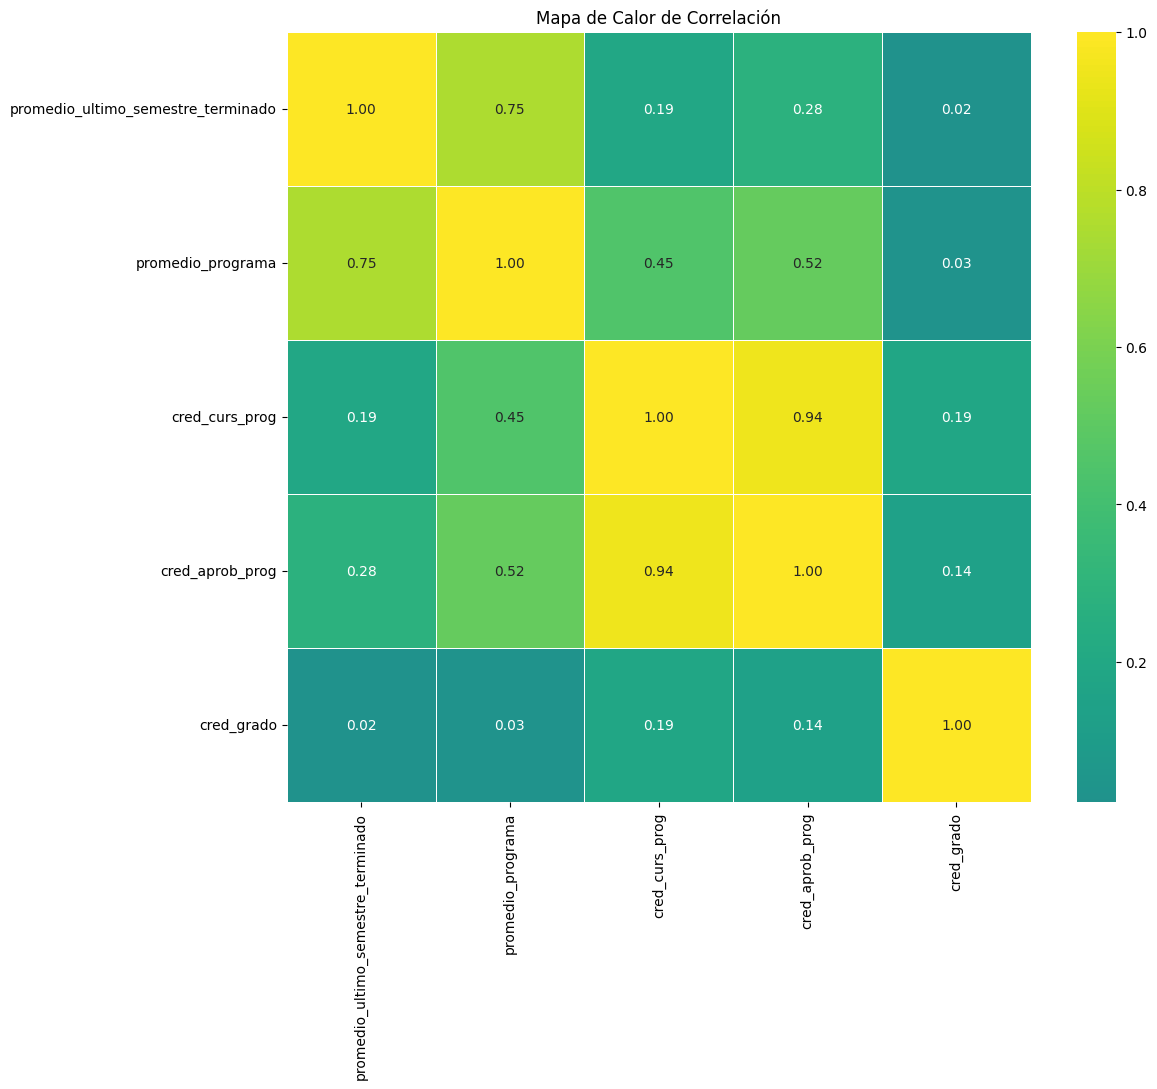

In [ ]:
# Mapa de calor de correlación
def graficar_mapa_correlacion(df):
    # Seleccionar las columnas numéricas
    numeric_vars = df.select_dtypes(include=['number']).columns

    # Calcular la matriz de correlación
    corr_matrix = df[numeric_vars].corr(method='pearson')  # Puedes cambiar 'pearson' por 'spearman'

    # Crear el mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0, fmt='.2f', linewidths=0.5)
    plt.title('Mapa de Calor de Correlación')
    plt.show()

# Llamar a la función para generar el mapa de calor de correlación
graficar_mapa_correlacion(df_final)

<p align="justify"> Se observa una alta correlación positiva entre variables como el nivel de pregrado y el número de semestres cursados, así como entre los créditos aprobados y los créditos cursados del programa, lo cual tiene sentido en el análisis, ya que el progreso académico tiende a estar relacionado con estas variables.


<p align="justify"> Por otro lado, el índice de pobreza muestra correlaciones débiles con la mayoría de las variables, lo que sugiere que su influencia lineal en el rendimiento académico es limitada. Sin embargo, presenta una correlación negativa moderada con el nivel de pregrado y el número de semestres, indicando que los estudiantes con mayores índices de pobreza suelen tener menor progreso académico.

<p align="justify"> El índice de pobreza es asignado dependiendo de la ciudad dónde nace o vive el estudiante, no es un valor adjunto al sujeto, sino al la locación. En este caso se evidencia una acumulación en el índice de pobreza correspondiente a la ciudad de Medellín.

<p align="justify"> Adicionalmente, el promedio del último semestre terminado muestra una correlación significativa con el promedio del programa, reflejando que el rendimiento individual está alineado con las expectativas generales del programa. Este análisis destaca las variables más relacionadas entre sí, y permite identificar áreas clave para un análisis más detallado o la inclusión en modelos predictivos.

In [ ]:
fig1 = px.histogram(df_final, x='programa', color='estu_genero', barmode='group', color_discrete_sequence=px.colors.diverging.Spectral)
fig1.update_layout(title="<b>Programa academico vs género del estudiante<b><br>", xaxis_title="Programas academicos")
fig1.show()

fig2 = px.histogram(df_final, x='programa', color='tipo_aceptacion', barmode='group', color_discrete_sequence=px.colors.diverging.Spectral)
fig2.update_layout(title="<b>Programa academico vs tipo de aceptación<b><br>", xaxis_title="Programas academicos")
fig2.show()

fig3 = px.histogram(df_final, x='programa', color='estrato', barmode='group', color_discrete_sequence=px.colors.diverging.Spectral)
fig3.update_layout(title="<b>Programa academico vs el estrato socioeconómico<b><br>", xaxis_title="Programas academicos")
fig3.show()

<p align="justify"> Se puede identificar que, en todos los programas existe una diferencia significativa en la cantidad de hombres y mujeres que desertan, siendo los hombres la mayoría, exceptuando Ingeniería Ambiental, donde la cantidad de hombres y mujeres desertores es similar. Además, se confirma que en todas las carreras, la mayoría de los desertores ingresaron por examen de admisión. Se observa que en la Universidad de Antioquia (UdeA), la mayoría de los estudiantes desertores pertenecen a los estratos socioeconómicos 2 y 3, evidenciando que la falta de recursos financieros es un gran determinante de la deserción académica.

In [ ]:
fig1 = px.box(df_final,
             x='programa',
             y='promedio_programa',
             color='programa')

fig1.update_layout(title_text='<b>Distribución del programa según el promedio de los estudiantes desertores<b>',
                   xaxis=dict(
                       title='programa',
                       titlefont_size=16),
                   yaxis=dict(
                       title='Promedio programa',
                       titlefont_size=16),
                   template='simple_white')
fig1.show()

fig2 = px.box(df_final,
             x='programa',
             y='num_semestres',
             color='programa')

fig2.update_layout(title_text='<b>Distribución del programa según el número de semestres de los estudiantes desertores<b>',
                   xaxis=dict(
                       title='programa',
                       titlefont_size=16),
                   yaxis=dict(
                       title='Número de semestres',
                       titlefont_size=16),
                   template='simple_white')
fig2.show()

<p align="justify"> Las gráficas evidencian la distribución de los programas académicos según el promedio de los estudiantes desertores, y el número de semestres que cursaron antes de desertar. En la primera gráfica, se observa que la mayoria de los estudiantes que desertan tienen promedios entre 3 y 3.4, en todos los programas hay pocos desertores por encima de 4, y por debajo de 2.

<p align="justify"> En la segunda gráfica se analiza la distribución del número de semestres cursados antes de desertar. Aquí se puede notar que la mayoría de los desertores abandonan en los primeros semestres. Por otro lado, todos los programas presentan casos de estudiantes que permanecen mucho más tiempo de lo esperado en la universidad y aun así, desertan.

<p align="justify"> En general, estas visualizaciones permiten identificar patrones en el rendimiento y la permanencia de los estudiantes desertores según la carrera, lo que puede ser útil para diseñar estrategias de intervención específicas.

#**Datos atípicos**

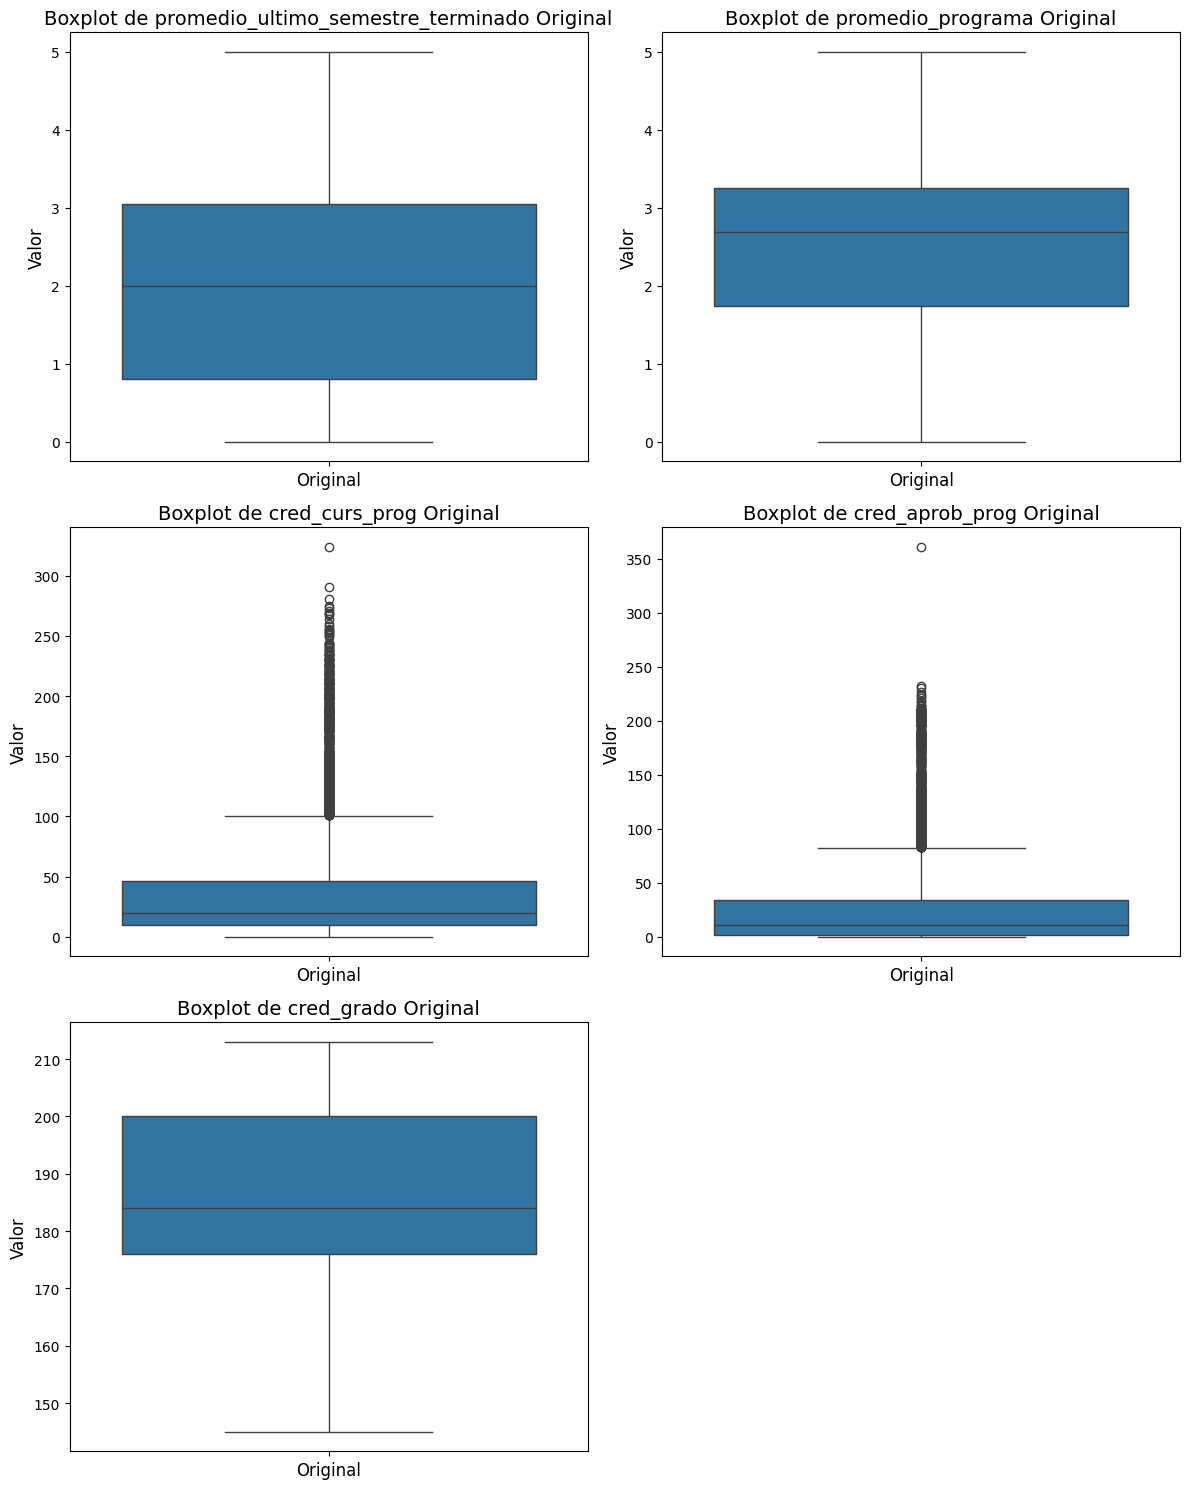

In [ ]:
def visual_outliers(df):
    numeric_cols = df.select_dtypes(include='number').columns

    # Boxplot
    df_comparison = pd.DataFrame()

    # Llenar el DataFrame con las columnas originales
    for col in numeric_cols:
        df_comparison[f'{col}_original'] = df_filt[col]  # Columna original
    num_vars = len(numeric_cols)

    # Determinar el número de filas y columnas para el diseño del subplot
    n_cols = 2
    n_rows = (num_vars + n_cols - 1) // n_cols  # Número de filas necesario

    #boxplots solo para los datos originales
    plt.figure(figsize=(12, 5 * n_rows))
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df_comparison[[f'{col}_original']])
        plt.title(f'Boxplot de {col} Original', fontsize=14)
        plt.xticks([0], ['Original'], fontsize=12)
        plt.xlabel('')
        plt.ylabel('Valor', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Histogramas
    n_cols = 2
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_cols], shared_yaxes=True)
    for i, column in enumerate(numeric_cols):
        # Agregar histograma sin leyenda
        hist = go.Histogram(x=df[column], name=f'Histograma {column}', nbinsx=30, opacity=0.75, marker=dict(color='blue', line=dict(color='black', width=1)), showlegend=False)
        fig_hist.add_trace(hist, row=(i // n_cols) + 1, col=(i % n_cols) + 1) #Fixed indentation

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        # Agregar KDE sin leyenda
        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red'), showlegend=False), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=300 * n_rows, width=800, title_text="Histogramas variables numéricas con KDE")
    fig_hist.show()

visual_outliers(df_final)

In [ ]:
# Identificacion de atipicos de variables numericas

numeric_cols = df_final.select_dtypes(include=[np.number]).columns
outliers_count = {}

# Identificar y contar atipicos usando IQR
for col in numeric_cols:
    col_data = df_final[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_final[col] < lower_bound) | (df_final[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Creacion un DataFrame con las cantidades de atipicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

                             Variable  Cantidad de Atípicos
0  promedio_ultimo_semestre_terminado                     0
1                   promedio_programa                     0
2                      cred_curs_prog                   778
3                     cred_aprob_prog                   763
4                          cred_grado                     0


In [ ]:
df_filt2 = df_final.copy()

# Imputar atípicos en cada columna numérica dos veces
for col in numeric_cols:

    for _ in range(2):  # Ejecutar el proceso dos veces
        col_data = df_filt2[col].dropna()

        # Calcular IQR
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Para otras variables, imputar con la mediana de los valores dentro de los límites de IQR
        median_non_outliers = df_filt2[(df_filt2[col] >= lower_bound) & (df_filt2[col] <= upper_bound)][col].median()

        # Reemplazar los valores atípicos con la mediana
        df_filt2.loc[(df_filt2[col] < lower_bound) | (df_filt2[col] > upper_bound), col] = median_non_outliers


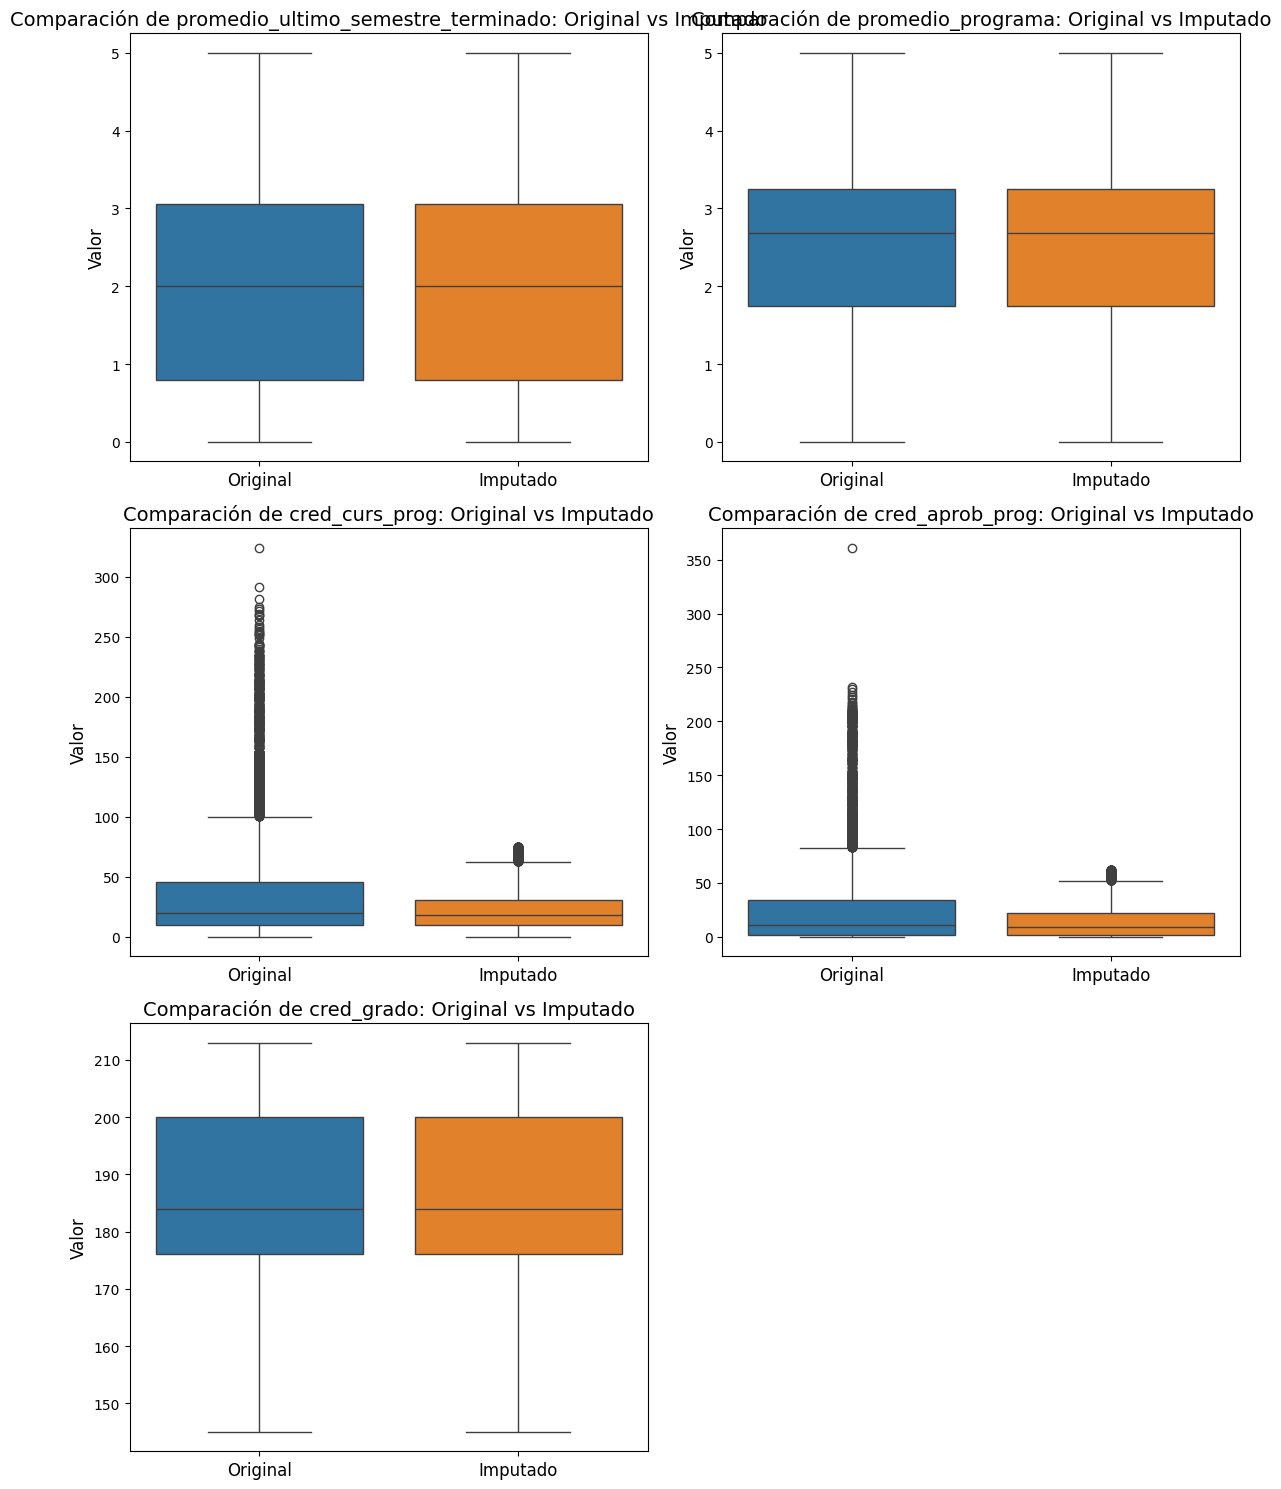

In [ ]:
# Creación de un DataFrame que combine los valores originales e imputados
df_comparison = pd.DataFrame()

for col in numeric_cols:
    df_comparison[f'{col}_original'] = df_final[col]
    df_comparison[f'{col}_imputed'] = df_filt2[col]

# Definir el número de filas según el número de variables numéricas
num_vars = len(numeric_cols)
rows = num_vars if num_vars <= 4 else (num_vars // 2) + (num_vars % 2)

# Generar los boxplots comparativos con un diseño más espacioso
plt.figure(figsize=(12, 5 * rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(data=df_comparison[[f'{col}_original', f'{col}_imputed']])
    plt.title(f'Comparación de {col}: Original vs Imputado', fontsize=14)
    plt.xticks([0, 1], ['Original', 'Imputado'], fontsize=12)
    plt.xlabel('')
    plt.ylabel('Valor', fontsize=12)

plt.tight_layout()
plt.show()

<p align="justify"> Se identificaron 5 variables númericas con valores atípicos, utilizando el método del rango intercuartílico. Se tomó la decisión de imputar los valores con la mediana de los datos. Este proceso no eliminó completamente los atípicos, variables como los créditos cursados y créditos aprobados, siguen presentando algunos outliers.

## Pruebas de normalidad de algunas variables relevantes


In [ ]:
# Prueba de normalidad estadística
from scipy.stats import shapiro

def prueba_normalidad(df, variables):
    for var in variables:
        stat, p_value = shapiro(df[var].dropna())  # Cambiar a scipy.stats.shapiro
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
# Asegúrate de que numeric_cols contenga una lista de nombres de columnas numéricas
variables = numeric_cols
prueba_normalidad(df_filt2, variables)

Prueba de Normalidad de Shapiro-Wilk para promedio_ultimo_semestre_terminado:
Estadístico: 0.9570768494480283, Valor-p: 3.245658780002132e-48
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para promedio_programa:
Estadístico: 0.9402341466633168, Valor-p: 5.1014513035863566e-54
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para cred_curs_prog:
Estadístico: 0.883309810119633, Valor-p: 8.630738473601966e-67
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para cred_aprob_prog:
Estadístico: 0.8276877617364577, Valor-p: 7.134255086938479e-75
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para cred_grado:
Estadístico: 0.907799986205088, Valor-p: 3.903090381320802e-62
Se rechaza la hipótesis nula: l

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10696.



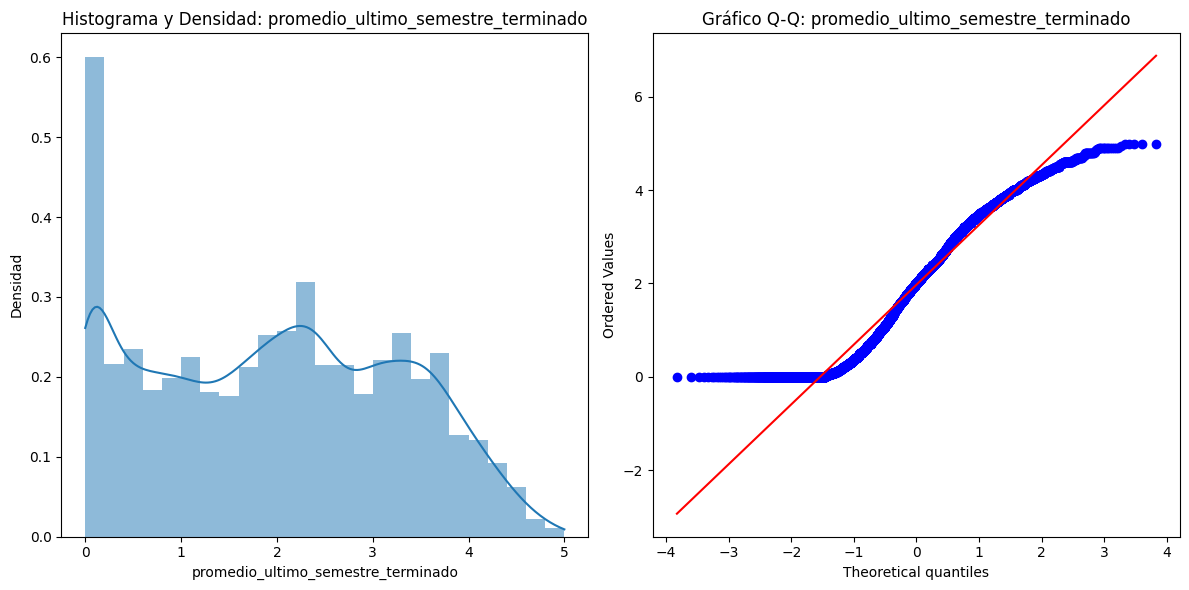

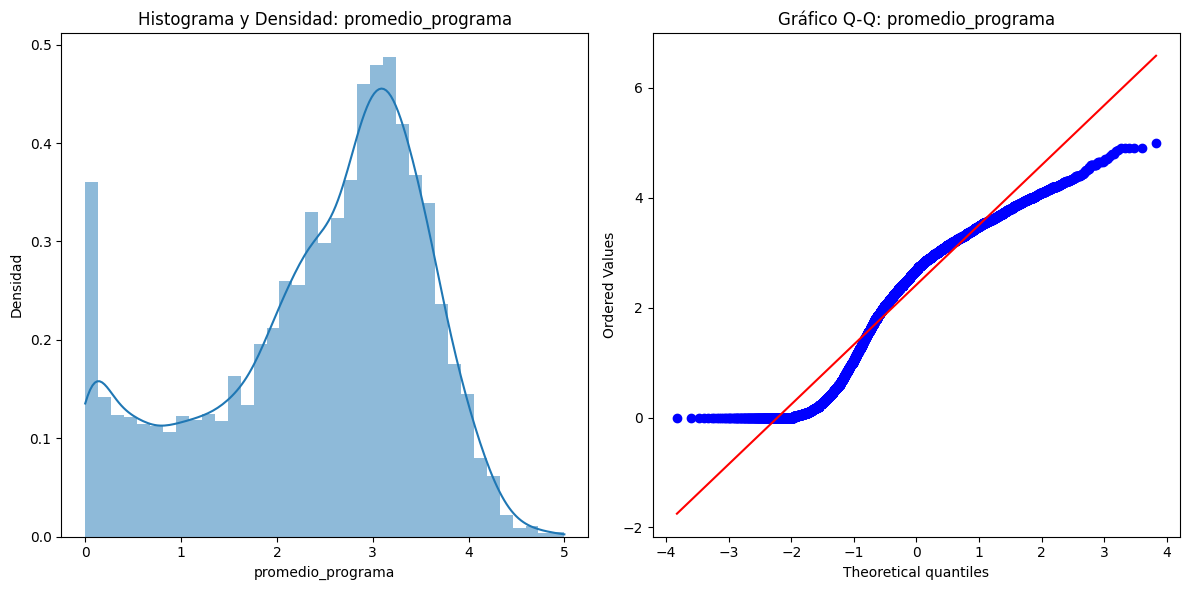

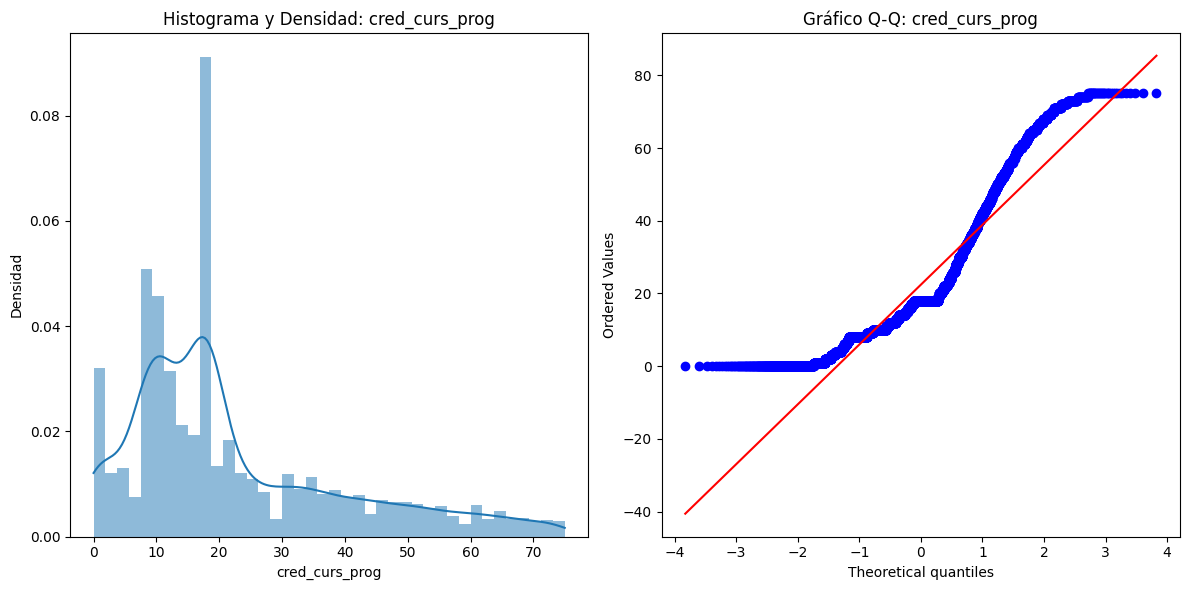

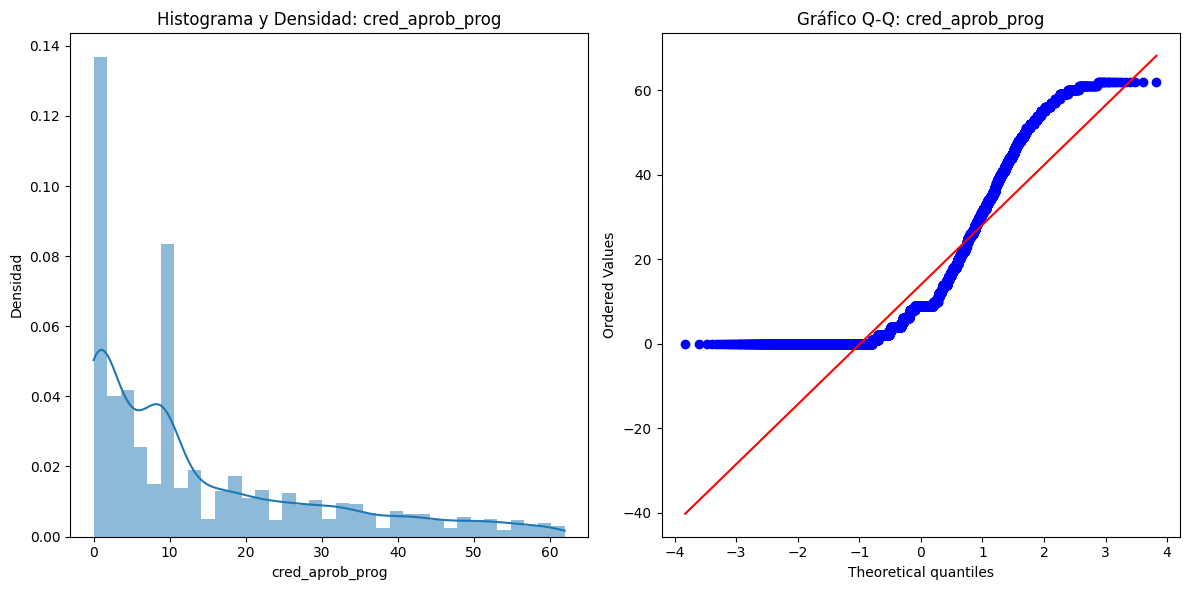

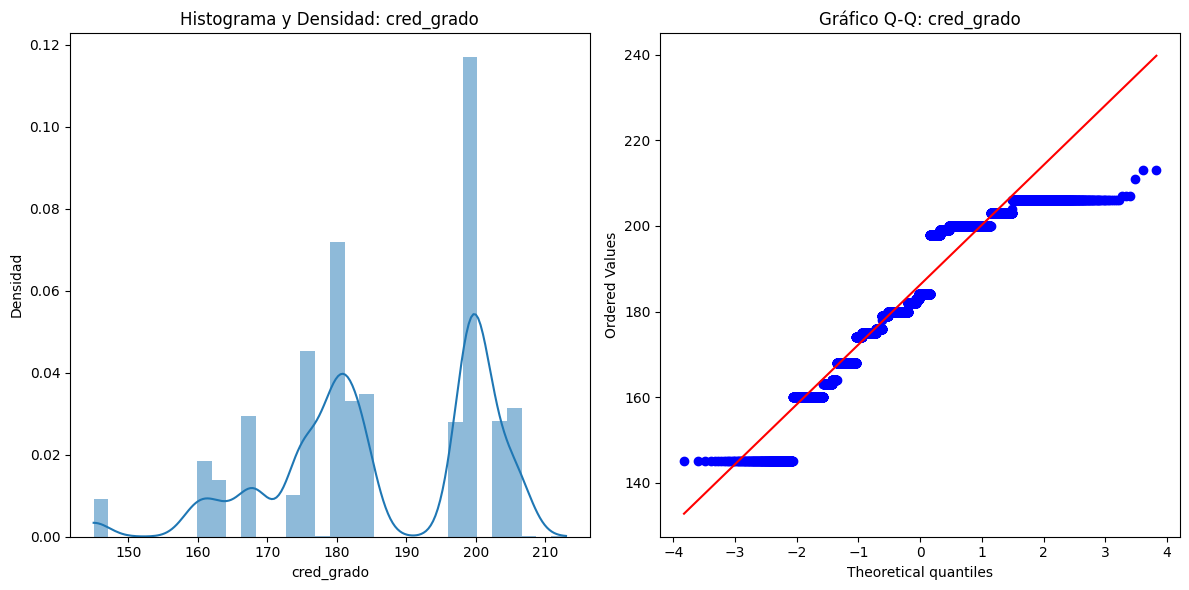

In [ ]:
# Prueba de normalidad gráfica
from scipy.stats import probplot

def evaluar_normalidad(df, variables):
    for var in variables:
        plt.figure(figsize=(12, 6))

        # Histograma con línea de densidad
        plt.subplot(1, 2, 1)
        sns.histplot(df[var].dropna(), kde=True, stat='density', linewidth=0)  # .dropna() para evitar problemas con NaN
        plt.title(f'Histograma y Densidad: {var}')
        plt.xlabel(var)
        plt.ylabel('Densidad')

        # Gráfico Q-Q
        plt.subplot(1, 2, 2)
        probplot(df[var].dropna(), dist="norm", plot=plt)
        plt.title(f'Gráfico Q-Q: {var}')

        plt.tight_layout()
        plt.show()

# Llama a la función con tus datos
evaluar_normalidad(df_filt2, variables)


<p align="justify"> Las pruebas iniciales de normalidad, realizadas mediante el test de Shapiro-Wilk, complementadas con las gráficas Q-Q y de densidad, indicaron que ninguna variable presenta distribuciones normales. Esta falta de normalidad en las variables podría presentar desafíos al aplicar ciertos modelos estadísticos o de aprendizaje automático, ya que esto en algunos casos ayuda a garantizar la validez de los resultados. Por lo tanto, es crucial considerar transformaciones o ajustes en los datos para tratar de encontrar normalidad en caso de ser posible.

### Transformación de los datos en busca de distribución normal

In [ ]:
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

# Crear una copia del DataFrame
dfc_transformado = df_filt2.copy()

# Aplicar transformaciones logarítmicas sobre las columnas relevantes
for col in numeric_cols:
    # Verificar si la columna no sigue una distribución normal
    stat, p_value = shapiro(dfc_transformado[col].dropna())
    if p_value <= 0.05:  # Si no sigue una distribución normal, aplicar logaritmo
        # Ajustar los valores para evitar números negativos o cero
        dfc_transformado[col] = np.log1p(dfc_transformado[col] - dfc_transformado[col].min() + 1)

# Estandarización de las variables numéricas después de la transformación
dfc_transformado[numeric_cols] = StandardScaler().fit_transform(dfc_transformado[numeric_cols])



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10696.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10696.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10696.



In [ ]:
#Prueba de normalidad estadistica con la transformacion

from scipy.stats import shapiro

# Prueba de normalidad estadística
def prueba_normalidad(df, variables):
    for var in variables:
        stat, p_value = shapiro(df[var].dropna())
        print(f'Prueba de Normalidad de Shapiro-Wilk para {var}:')
        print(f'Estadístico: {stat}, Valor-p: {p_value}')
        if p_value > 0.05:
            print('No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.')
        else:
            print('Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.')
        print("\n")

# Realizar la prueba de normalidad
variables = numeric_cols
prueba_normalidad(dfc_transformado, variables)


Prueba de Normalidad de Shapiro-Wilk para promedio_ultimo_semestre_terminado:
Estadístico: 0.9389929811513889, Valor-p: 2.1681432238108648e-54
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para promedio_programa:
Estadístico: 0.875274645796023, Valor-p: 3.878757098897674e-68
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para cred_curs_prog:
Estadístico: 0.9438801474906204, Valor-p: 6.878684363918711e-53
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para cred_aprob_prog:
Estadístico: 0.9246985133000312, Valor-p: 2.848209441932745e-58
Se rechaza la hipótesis nula: los datos no parecen seguir una distribución normal.


Prueba de Normalidad de Shapiro-Wilk para cred_grado:
Estadístico: 0.6739354989304396, Valor-p: 4.0495440501727386e-89
Se rechaza la hipótesis nula:

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10696.



<p align="justify"> A pesar de haber aplicado transformaciones logarítmicas a las variables con el objetivo de acercarlas a una distribución normal, los resultados indicaron que dichas variables aún no cumplen con el supuesto de normalidad. Se decidió que el análisis continúe utilizando la base de datos original, 'df_filt2', sin aplicar las transformaciones.

<p align="justify"> Este enfoque permitirá mantener la integridad de los datos tal como fueron recolectados y evitar distorsiones que puedan surgir de las transformaciones, lo que facilitará una evaluación más realista y representativa del comportamiento de las variables.

#**Categorizacion**

En el planteamiento del problema se definió que la solución está encaminada a la predicción de los tipos de desertores y sus características. Según la normativa establecida por la universidad, los tipos de desertores se clasifican así:

* Desertores precoces: estudiantes que son admitidas, pero nunca realizan la matrícula.

* Desertores tempranos: estudiantes que desertan entre el primer y tercer semestre matriculado.

* Desertores al corte: estudiantes que desertan entre el cuarto y décimo semestre matriculado.

* Desertores después del corte: estudiantes que desertan después del décimo semestre matriculado.

Con base estas definiciones, se crea una nueva columna que clafisique cada estudiante.


In [ ]:
df_filt_sol=df_filt2

In [ ]:
def no_foraneos(row):
    nacimiento=row["municipio_nacimiento"]
    vive=row["municipio_vive"]
    if (nacimiento == "MEDELLIN" or nacimiento=="MEDELLIN-CENTRO") and (vive=="MEDELLIN" or vive=="MEDELLIN-CENTRO"):
        return "1"
    else:
        return "0"
def foraneos(row):
    nacimiento=row["municipio_nacimiento"]
    vive=row["municipio_vive"]
    if (nacimiento != "MEDELLIN" and nacimiento !="MEDELLIN-CENTRO") or (vive!="MEDELLIN" and vive !="MEDELLIN-CENTRO"):
        return "1"
    else:
        return "0"
df_filt_sol["foraneos"]=df_filt_sol.apply(foraneos,axis=1)
df_filt_sol["no_foraneos"]=df_filt_sol.apply(no_foraneos,axis=1)
df_filt_sol

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
0            MASC           1985            CUBA               LA HABANA   
1            FEME           2002          TAIWAN             DESCONOCIDO   
2            MASC           2004            PERU                    LIMA   
3            MASC           1999            PERU                    LIMA   
4            MASC           2002            PERU                    LIMA   
...           ...            ...             ...                     ...   
10691        MASC           1999        COLOMBIA               ANTIOQUIA   
10692        FEME           1999        COLOMBIA               ANTIOQUIA   
10693        MASC           1999        COLOMBIA               ANTIOQUIA   
10694        MASC           1999        COLOMBIA               ANTIOQUIA   
10695        MASC           1999        COLOMBIA               ANTIOQUIA   

      municipio_nacimiento departamento_vive municipio_vive  ind_pobreza  \
0                LA HABANA         ANTIOQUIA         ITAGUI  20.53571429   
1              DESCONOCIDO         ANTIOQUIA          BELLO   16.2464986   
2                     LIMA         ANTIOQUIA         ITAGUI  20.53571429   
3               MIRAFLORES         ANTIOQUIA       MEDELLIN  22.55095332   
4                     LIMA         ANTIOQUIA       ENVIGADO   8.85786802   
...                    ...               ...            ...          ...   
10691           COPACABANA         ANTIOQUIA     COPACABANA  16.68287938   
10692               AMALFI         ANTIOQUIA       MEDELLIN  22.55095332   
10693             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   
10694             MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
10695             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   

      estrato naturaleza_cole                       programa  \
0         3.0      NO OFICIAL               INGENIERÍA CIVIL   
1         2.0      NO OFICIAL                  BIOINGENIERÍA   
2         3.0         OFICIAL             INGENIERÍA QUÍMICA   
3         4.0      NO OFICIAL         INGENIERÍA DE SISTEMAS   
4         3.0      NO OFICIAL            INGENIERÍA MECÁNICA   
...       ...             ...                            ...   
10691     2.0         OFICIAL  INGENIERIA TELECOMUNICACIONES   
10692     2.0      NO OFICIAL               INGENIERÍA CIVIL   
10693     3.0      NO OFICIAL           INGENIERÍA AMBIENTAL   
10694     5.0     DESCONOCIDO               INGENIERÍA CIVIL   
10695     2.0      NO OFICIAL         INGENIERÍA ELECTRÓNICA   

      semestre_inicia_programa ultimo_semestre_terminado  \
0                        20112                     20121   
1                        20201                     20201   
2                        20231                     20231   
3                        20172                     20182   
4                        20192                     20192   
...                        ...                       ...   
10691                    20171                     20171   
10692                    20171                     20171   
10693                    20172                     20172   
10694                    20171                     20171   
10695                    20172                     20172   

       promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
0                                    2.40                       20122   
1                                    4.11                       20201   
2                                    0.68                       20231   
3                                    3.73                       20182   
4                                    3.33                       20192   
...                                   ...                         ...   
10691                                1.69                       20171   
10692                                2.99                       20171   
10693                            

In [ ]:
#creación de columnas por desertores
df_filt_sol["desertores_precoces"]=((df_filt_sol["cred_curs_prog"]==0)&(df_filt_sol["num_semestres"]>=1)).astype(int)
df_filt_sol["desertores_tempranos"]=((df_filt_sol["cred_curs_prog"]>0)&(df_filt_sol["num_semestres"]>=1)&(df_filt_sol["num_semestres"]<=3)).astype(int)
df_filt_sol["desertores_al_corte"]=((df_filt_sol["cred_curs_prog"]>0)&(df_filt_sol["num_semestres"]>=4)&(df_filt_sol["num_semestres"]<=10)).astype(int)
df_filt_sol["desertores_despues_del_corte"]=((df_filt_sol["num_semestres"]>10)).astype(int)
df_filt_sol

estu_genero ano_nacimiento pais_nacimiento departamento_nacimiento  \
0            MASC           1985            CUBA               LA HABANA   
1            FEME           2002          TAIWAN             DESCONOCIDO   
2            MASC           2004            PERU                    LIMA   
3            MASC           1999            PERU                    LIMA   
4            MASC           2002            PERU                    LIMA   
...           ...            ...             ...                     ...   
10691        MASC           1999        COLOMBIA               ANTIOQUIA   
10692        FEME           1999        COLOMBIA               ANTIOQUIA   
10693        MASC           1999        COLOMBIA               ANTIOQUIA   
10694        MASC           1999        COLOMBIA               ANTIOQUIA   
10695        MASC           1999        COLOMBIA               ANTIOQUIA   

      municipio_nacimiento departamento_vive municipio_vive  ind_pobreza  \
0                LA HABANA         ANTIOQUIA         ITAGUI  20.53571429   
1              DESCONOCIDO         ANTIOQUIA          BELLO   16.2464986   
2                     LIMA         ANTIOQUIA         ITAGUI  20.53571429   
3               MIRAFLORES         ANTIOQUIA       MEDELLIN  22.55095332   
4                     LIMA         ANTIOQUIA       ENVIGADO   8.85786802   
...                    ...               ...            ...          ...   
10691           COPACABANA         ANTIOQUIA     COPACABANA  16.68287938   
10692               AMALFI         ANTIOQUIA       MEDELLIN  22.55095332   
10693             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   
10694             MEDELLIN         ANTIOQUIA       ENVIGADO   8.85786802   
10695             MEDELLIN         ANTIOQUIA       MEDELLIN  22.55095332   

      estrato naturaleza_cole                       programa  \
0         3.0      NO OFICIAL               INGENIERÍA CIVIL   
1         2.0      NO OFICIAL                  BIOINGENIERÍA   
2         3.0         OFICIAL             INGENIERÍA QUÍMICA   
3         4.0      NO OFICIAL         INGENIERÍA DE SISTEMAS   
4         3.0      NO OFICIAL            INGENIERÍA MECÁNICA   
...       ...             ...                            ...   
10691     2.0         OFICIAL  INGENIERIA TELECOMUNICACIONES   
10692     2.0      NO OFICIAL               INGENIERÍA CIVIL   
10693     3.0      NO OFICIAL           INGENIERÍA AMBIENTAL   
10694     5.0     DESCONOCIDO               INGENIERÍA CIVIL   
10695     2.0      NO OFICIAL         INGENIERÍA ELECTRÓNICA   

      semestre_inicia_programa ultimo_semestre_terminado  \
0                        20112                     20121   
1                        20201                     20201   
2                        20231                     20231   
3                        20172                     20182   
4                        20192                     20192   
...                        ...                       ...   
10691                    20171                     20171   
10692                    20171                     20171   
10693                    20172                     20172   
10694                    20171                     20171   
10695                    20172                     20172   

       promedio_ultimo_semestre_terminado ultimo_semestre_matriculado  \
0                                    2.40                       20122   
1                                    4.11                       20201   
2                                    0.68                       20231   
3                                    3.73                       20182   
4                                    3.33                       20192   
...                                   ...                         ...   
10691                                1.69                       20171   
10692                                2.99                       20171   
10693                            

#Selección de variables

<p align="justify">La selección de variables es un proceso importante para el preprocesamiento, pues este permite elegir las variables más representativas o importantes, que contribuyen más a la predicción de la variable respuesta.

<p align="justify">En este caso se utiliza el método de 'select Kbest' de Sklearn. Este selecciona características por medio de filtros de aprendizaje supervisado. Se eligen las mejores xx variables, entre las cuales se encuentran: 'promedio_ultimo_semestre_terminado', 'promedio_programa' y 'cred_curs_prog', 'cred_aprob_prog'. Es importante mencionar que en el grupo seleccionado se encuentran variables categóricas y numéricas.

In [ ]:
def preprocess_features(df):
    # Procesar variables categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        valores = df[col].unique()
        if len(valores) == 2:
            df[col] = df[col].map({valores[0]: 0, valores[1]: 1})
        else:
            # Si hay más de dos categorías, crear dummies
            dummies = pd.get_dummies(df[col], prefix=col, drop_first= False)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    # Procesar columnas booleanas
    boolean_cols = df.select_dtypes(include='bool').columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    # Identificar columnas numéricas
    numcol = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]

    # Aplicar Min-Max Scaling
    scaler = MinMaxScaler()
    df[numcol] = scaler.fit_transform(df[numcol])

    return df

df_dum_fin=df_filt_sol.copy()
df_dum_fin=preprocess_features(df_dum_fin)

In [ ]:
# Crear una columna de categorías de deserción
df_dum_fin['desercion_categoria'] = np.select(
    [
        df_dum_fin['desertores_precoces'] == 1,
        df_dum_fin['desertores_tempranos'] == 1,
        df_dum_fin['desertores_al_corte'] == 1,
        df_dum_fin['desertores_despues_del_corte'] == 1
    ],
    [
        'desertores_precoces',
        'desertores_tempranos',
        'desertores_al_corte',
        'desertores_despues_del_corte'
    ],
    #default='no_desertor'
)

<ipython-input-75-84b5e54b15c6>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
X = df_dum_fin.drop(['desertores_precoces', 'desertores_tempranos', 'desertores_al_corte', 'desertores_despues_del_corte', 'desercion_categoria'], axis=1)
y = df_dum_fin['desercion_categoria']

In [ ]:
# Crear el label encoder
le = LabelEncoder()
le.fit(y)

# Transformar
y_encoded = le.transform(y)
y_encoded

array([3, 3, 2, ..., 3, 3, 3])

In [ ]:
np.unique(y_encoded)

array([0, 1, 2, 3])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Aplicar Select K best
selector = SelectKBest(score_func=f_classif, k = 30)
X_new = selector.fit_transform(X, y_encoded) #variables nuevas

# Seleccionar las variables
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

Selected Features: Index(['promedio_ultimo_semestre_terminado', 'promedio_programa',
       'cred_curs_prog', 'cred_aprob_prog', 'semestre_inicia_programa_20231',
       'semestre_inicia_programa_20232', 'ultimo_semestre_terminado_20231',
       'ultimo_semestre_matriculado_20231', 'nivel_pregrado_1',
       'nivel_pregrado_2', 'nivel_pregrado_3', 'nivel_pregrado_4',
       'nivel_pregrado_7', 'nivel_pregrado_10', 'periodos_prueba_programa_0',
       'periodos_prueba_programa_2', 'num_semestres_1.0', 'num_semestres_2.0',
       'num_semestres_3.0', 'num_semestres_4.0', 'num_semestres_5.0',
       'num_semestres_6.0', 'num_semestres_7.0', 'num_semestres_8.0',
       'num_semestres_11.0', 'num_semestres_12.0', 'num_semestres_13.0',
       'num_semestres_14.0', 'num_semestres_15.0',
       'semestre_admision_programa_DESCONOCIDO'],
      dtype='object')


# Ajuste de redes neuronales

In [ ]:
X = df_dum_fin[selected_features]
y = df_dum_fin['desercion_categoria']

# Codificar las etiquetas de deserción a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Seleccionar solo las columnas numéricas para el escalado
X_numeric = X.select_dtypes(include=[np.number])

# Estandarizar las características numéricas
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Convertir a DataFrame para poder concatenar
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns, index=X.index)

# Combinar las columnas numéricas escaladas con las no numéricas
X_scaled = pd.concat([X_numeric_scaled_df, X.select_dtypes(exclude=[np.number])], axis=1)

# Dividir los datos en 70% para entrenamiento, 20% para validación, y 10% para prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y_encoded, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.222, random_state=42)

# Imprimir las formas de los conjuntos de datos resultantes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (7489, 30) (7489,)
Validation shape: (2137, 30) (2137,)
Test shape: (1070, 30) (1070,)


<p align="justify"> En base a la nueva columna creada, que contiene la información agrupada sobre la deserción se realiza la división en entrenamiento del 70%, validacion del 20% y test del 10%, esta nueva columna es sumamente importante para el posterior análisis de clasificación, puesto que es la que contiene las categorias a agrupar

### Arquitectura inicial - Prueba 1

<p align="justify"> Para la selección del número de neuronas en la arquitectura inicial de la red neuronal, se consideró que fueran múltiplos de dos. Además, se definieron rangos relativamente amplios para incluir un mayor número de neuronas, lo que permitió analizar diferentes comportamientos durante el entrenamiento. De esta manera se facilita identificar oportunidades de mejora y optimización en iteraciones posteriores de la arquitectura.

<p align="justify"> En cuanto a la elección de las funciones de activación de las capas ocultas, estas incialmente se decidieron seleccionar de manera aleatoria, tratando de priorizar la función "relu" que es las más adecuada en el caso de datos que serán tratados como regresiones sea lineal o logística.

Por último en la capa de salida se usó la función de activación "softmax" dado que el algoritmo a entrenar es de clasificación.

In [ ]:
# ANN para la clasificación de categorías de deserción
ann = keras.models.Sequential([
    keras.layers.Input(shape=[X_train.shape[1]]),  # Capa de entrada
    keras.layers.Dense(256, activation='tanh'),   # primera capa oculta
    keras.layers.Dense(128, activation='relu'),   # segunda capa oculta
    keras.layers.Dense(64, activation='relu'),    # tercera capa oculta
    keras.layers.Dense(4, activation='softmax')  # Capa de salida con softmax
])

# Resumen de la arquitectura
ann.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,348 (192.77 KB)

 Trainable params: 49,348 (192.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Resumen de la arquitectura
ann.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 256)                 │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,348 (192.77 KB)

 Trainable params: 49,348 (192.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilación de la red
ann.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


<p align="justify"> En este caso para el algoritmo de perdidas se seleccionó la función de 'sparse_categorical_crossentropy' dado que es la más adecuada cuando se trata de algoritmos de clasificación de multiples categorias dependientes, como lo es este caso.

 <p align="justify"> Para la seleccion del optimizador se optó por el optimizador adam ya que este es de los mas completos, capaz de combinar las ventajas del algoritmo RMSprop y de Momentum. Además de ajustar la tasa de aprendizaje de forma adaptativa para cada parametro.

In [ ]:
# Entrenamiento de la red neuronal
history = ann.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8808 - loss: 0.3252 - val_accuracy: 0.9691 - val_loss: 0.0785
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0659 - val_accuracy: 0.9719 - val_loss: 0.0584
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - loss: 0.0595 - val_accuracy: 0.9780 - val_loss: 0.0493
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0567 - val_accuracy: 0.9785 - val_loss: 0.0501
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0437 - val_accuracy: 0.9705 - val_loss: 0.0734
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.0469 - val_accuracy: 0.9743 - val_loss: 0.0584
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0426 - val_accuracy: 0.9850 - val_loss: 0.0444
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0392 - val_accuracy: 0.

<p align="justify"> Se decide ensayar el modelo con 10 epochs y de acuerdo al resultado se puede concluir que el número podria incluso subir un poco más en proximas pruebas dado que en validación aun seguia mejorando.

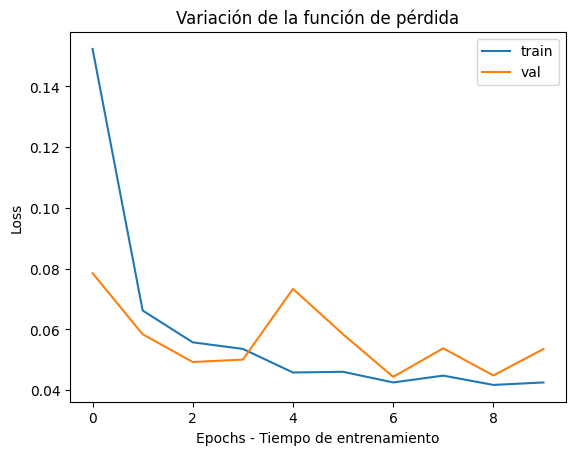

In [ ]:
# Visualización de las curvas de error (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Variación de la función de pérdida')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()


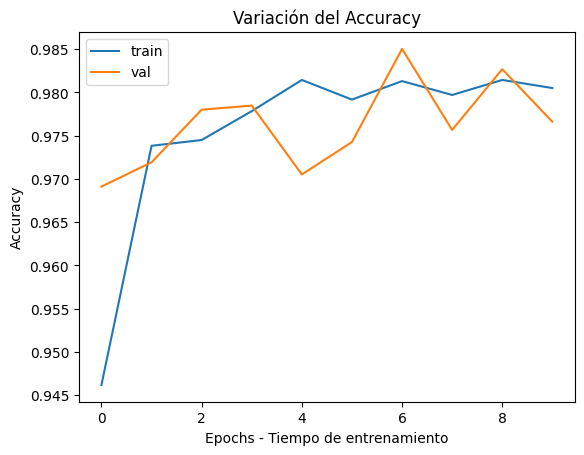

In [ ]:
# Visualización de las curvas de Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Variación del Accuracy')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


<p align="justify"> En los gráficos de pérdida y validación, se evidencia que el modelo es capaz de llegar a un buen nivel de estabilidad en entrenamiento, pero es visiblemente claro que aún existe un posible rango de mejora en validación dado el sobreajuste más alto a medida que aumentan los epochs.

In [ ]:
# Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_acc = ann.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.0656
Test accuracy: 0.9747663736343384


<p align="justify"> Aunque el resultado del test accuracy es alto, se deduce de los gráficos y el resto del análisis anterior que hay espacio de mejora para esta métrica, es por tanto que se realizan las pruebas siguientes.

### Arquitectura reduciendo neuronas - Prueba 2

<p align="justify"> Se decidió reducir el número de neuronas debido al sobreajuste observado en el modelo anterior, el cual podría haber sido causado por la cantidad excesiva de neuronas utilizadas.

<p align="justify"> En esta iteración, se optó por disminuir a la mitad el número de neuronas en cada capa con respecto a la arquitectura previa, con el objetivo de mantener un buen desempeño durante el entrenamiento mientras se reducia el sobreajuste asociado a la alta complejidad del modelo.

<p align="justify"> Sobre las capas ocultas y de salida se decidió mantener las mismas funciones de activación.

In [ ]:
# ANN para la clasificación de categorías de deserción


ann2 = keras.models.Sequential([
    keras.layers.Input(shape=[X_train.shape[1]]),  # Capa de entrada
    keras.layers.Dense(128, activation='tanh'),   # primera capa oculta
    keras.layers.Dense(64, activation='relu'),   # segunda capa oculta
    keras.layers.Dense(32, activation='relu'),    # tercera capa oculta
    keras.layers.Dense(4, activation='softmax')  # Capa de salida con softmax
])

# Resumen de la arquitectura
ann2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,436 (56.39 KB)

 Trainable params: 14,436 (56.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Resumen de la arquitectura
ann2.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 128)                 │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,436 (56.39 KB)

 Trainable params: 14,436 (56.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilación de la red
ann2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history2 = ann2.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val))

Epoch 1/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8453 - loss: 0.4378 - val_accuracy: 0.9635 - val_loss: 0.0906
Epoch 2/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.0701 - val_accuracy: 0.9789 - val_loss: 0.0561
Epoch 3/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0629 - val_accuracy: 0.9799 - val_loss: 0.0518
Epoch 4/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.0468 - val_accuracy: 0.9672 - val_loss: 0.0803
Epoch 5/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0485 - val_accuracy: 0.9775 - val_loss: 0.0469
Epoch 6/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0435 - val_accuracy: 0.9789 - val_loss: 0.0466
Epoch 7/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0397 - val_accuracy: 0.9743 - val_loss: 0.0593
Epoch 8/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0414 - val_accuracy: 0.

<p align="justify"> En este segundo entrenamiento, se decidió establecer el número de epochs en 12, ya que se consideró el más adecuado para las condiciones de la red neuronal y como se vio en la prueba anterior era adecuado probar con un número de epoch algo más grande. Este ajuste busca compensar la reducción en el número de neuronas en la nueva arquitectura, permitiendo al modelo realizar más iteraciones para optimizar su rendimiento y alcanzar valores más cercanos al óptimo.


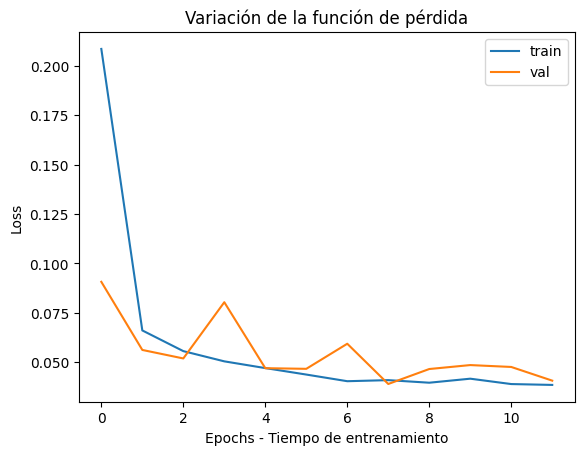

In [ ]:
# Visualización de las curvas de error (loss)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Variación de la función de pérdida')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()


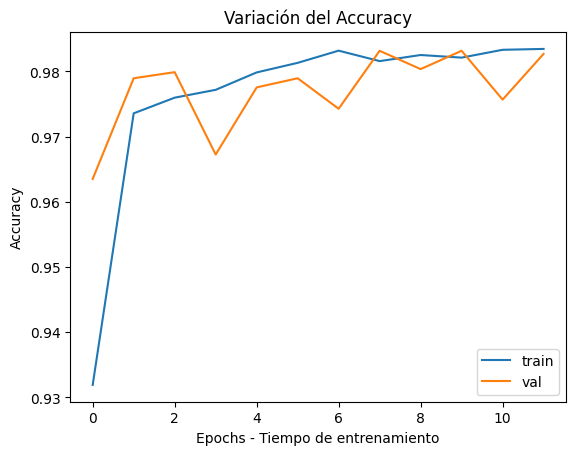

In [ ]:
# Visualización de las curvas de Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Variación del Accuracy')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


<p align="justify"> En los gráficos de pérdida y validación, se evidencia mejora respecto al algoritmo anterior, aunque es cierto que bastante sútil. Si bien el modelo alcanza un nivel aceptable de estabilidad, es evidente que, aunque el sobreajuste ha disminuido ligeramente, aún existe un margen de mejora que podría optimizar el rendimiento del modelo.



In [ ]:
# Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_acc = ann2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0425 
Test accuracy: 0.982243001461029


<p align="justify"> Aunque el resultado del test accuracy es alto, es claro segun el análisis anterior que aún sigue existiendo espacio de mejora para esta métrica.

### Arquitectura ANN Regularizada L2 - Prueba 3

<p align="justify"> En esta arquitectura se mantuvieron los mismos parámetros utilizados en la arquitectura 2, ya que, de las dos evaluadas hasta el momento, fue la que obtuvo los mejores resultados. Sin embargo, con el objetivo de mejorar aún más, se decidió agregar una regularización L2 con un valor inicial estándar de 0.01, buscando optimizar los resultados obtenidos.

<p align="justify"> En cuanto a la función de pérdida, el optimizador y el número de epochs, se conservaron sin cambios, ya que estaban generando resultados satisfactorios en su configuración actual. En resumen, el objetivo principal fue evaluar si la incorporación de la regularización L2 podía ofrecer mejoras adicionales al desempeño del modelo.

In [ ]:
## ANN2: red neuronal con regularización L2
ann3 = keras.models.Sequential()
ann3.add(keras.layers.Input(shape=[X_train.shape[1]]))
ann3.add(keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.L2(l2=0.01)))
ann3.add(keras.layers.Dense(64, activation='relu'))
ann3.add(keras.layers.Dense(32, activation='relu'))
ann3.add(keras.layers.Dense(4, activation='softmax'))

# Compilación de la ANN1 (Optimización de la ANN)
ann3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entrenamiento de la Red Neuronal
history3 = ann3.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val))

Epoch 1/12


KeyboardInterrupt: 

In [ ]:
# Visualización de las curvas de error
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Variación de la función de pérdida - ANN2')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Visualización de las curvas de Accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Variación del Accuracy - ANN2')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

<p align="justify"> En los gráficos de pérdida y validación, se evidencia que el modelo es capaz de llegar a un muy buen nivel de estabilidad, que se mantiene durante todo el tiempo de entrenamiento, reduciendo lo mejor posible el sobreajuste en comparación a arquitecturas probadas anteriormente.

<p align="justify"> Por lo tanto, se decide continuar de momento con esta tercera arquitectura, ya que ha demostrado una mejor estabilidad durante todas las iteraciones.

In [ ]:
# Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_acc = ann3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

<p align="justify"> En esta arquitectura es donde podemos evideciar el mejor resultado para la métrica de accuracy encontrado hasta el momento en todas las arquitecturas probadas. Y no solo esto, si no que además graficamente donde mejor se pueden apreciar estas mejoras.

### Arquitectura ANN Regularizada DROPOUT - Prueba 4


<p align="justify"> En esta arquitectura se mantuvieron los mismos parámetros utilizados en la arquitectura 3, ya que, de las evaluadas hasta el momento, fue la que obtuvo los mejores resultados. Sin embargo, con el objetivo de mejorar aún más, se decidió probar una regularización DROPOUT con valores no muy extremos para evitar eliminar un porcentaje muy significativo de las neuronas, con un valor de 0.3 para la capa oculta 1, y un valor de 0.2 para la capa oculta 2, buscando optimizar los resultados obtenidos.

<p align="justify"> En cuanto a la función de pérdida, el optimizador y el número de epochs, se conservaron sin cambios, ya que estaban generando resultados satisfactorios en su configuración actual. En resumen, el objetivo principal fue evaluar si la incorporación de la regularización DROPOUT podía ofrecer mejoras adicionales al desempeño del modelo.

In [ ]:
## ANN4: red neuronal con regularización L2
ann4 = keras.models.Sequential()
ann4.add(keras.layers.Input(shape=[X_train.shape[1]]))
ann4.add(keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.L2(l2=0.01)))
ann4.add(keras.layers.Dropout(0.3))
ann4.add(keras.layers.Dense(64, activation='relu'))
ann4.add(keras.layers.Dropout(0.2))
ann4.add(keras.layers.Dense(32, activation='relu'))
ann4.add(keras.layers.Dense(4, activation='softmax'))

# Compilación de la ANN1 (Optimización de la ANN)
ann4.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entrenamiento de la Red Neuronal
history4 = ann4.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val))

Epoch 1/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8171 - loss: 0.9180 - val_accuracy: 0.9677 - val_loss: 0.2589
Epoch 2/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.2242 - val_accuracy: 0.9729 - val_loss: 0.1357
Epoch 3/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1398 - val_accuracy: 0.9682 - val_loss: 0.1147
Epoch 4/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9673 - loss: 0.1167 - val_accuracy: 0.9701 - val_loss: 0.1153
Epoch 5/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9736 - loss: 0.0947 - val_accuracy: 0.9803 - val_loss: 0.0771
Epoch 6/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9721 - loss: 0.0950 - val_accuracy: 0.9766 - val_loss: 0.0849
Epoch 7/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9705 - loss: 0.0923 - val_accuracy: 0.9761 - val_loss: 0.0779
Epoch 8/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9733 - loss: 0.0869 - val_accuracy: 0.

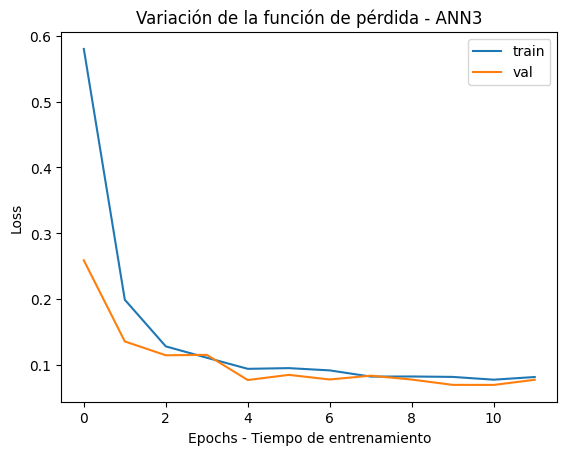

In [ ]:
# Visualización de las curvas de error
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Variación de la función de pérdida - ANN3')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

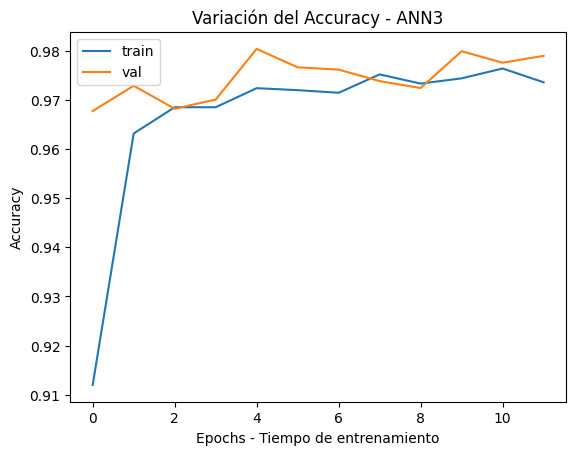

In [ ]:
# Visualización de las curvas de Accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Variación del Accuracy - ANN3')
plt.xlabel('Epochs - Tiempo de entrenamiento')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

<p align="justify"> En los gráficos de pérdida y validación, se observa una mejora muy notable en comparación con las dos primeras pruebas. El modelo muestra una estabilidad más consistente a lo largo de las iteraciones, sin evidenciar un sobreajuste significativo como en las pruebas previas.

Pero empeora muy levemente respecto a la prueba # 3.

In [ ]:
# Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_acc = ann4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9653 - loss: 0.0925 
Test accuracy: 0.9700934290885925


<p align="justify"> Los resultados de esta arquitectura muestran una estabilidad destacable, aunque ligeramente inferiores a los obtenidos por la arquitectura 3. Por lo tanto, se decide que la arquitectura 3, previa a la optimización de hiperparámetros, es la mejor hasta el momento. Esta arquitectura ha presentado el mejor rendimiento en la métrica de accuracy de todas las probadas.

## Optimización de Hiperparámetros

<p align="justify"> Este modelo está diseñado para optimizar los hiperparámetros de manera automática, permitiendo que el propio algoritmo explore las combinaciones más adecuadas. Para lograrlo, se definieron rangos amplios de posibles valores para el número de neuronas en cada capa, así como múltiples opciones para los parámetros de regularización L2 y Dropout.

<p align="justify"> En cuanto a las funciones de activación, se permitió que el algoritmo seleccionara entre las dos más comunes y adecuadas para modelos de clasificación: "Relu" y "tanh".

<p align="justify"> Finalmente, tanto la función de activación de la capa de salida como la función de pérdida se mantuvieron fijas, ya que este es un problema de clasificación multiclase, y dichos valores son esenciales para garantizar la coherencia en este tipo de tarea.

In [ ]:
# Definición de Hyper Model: Modelo para Tunear

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=[X_train.shape[1]]))

  # Definciónde la primera capa oculta con ajuste de hiperparámetros: # Neuronas, Función de activación
  hp_activation_1 = hp.Choice('activation_1', values=['relu', 'tanh'])
  hp_units_1 = hp.Int('units_1', min_value=32, max_value=256, step=16)
  model.add(keras.layers.Dense(units=hp_units_1, activation=hp_activation_1))

  # Definición de la capa de dropout con ajuster de hiperparámetro: droupout_rate
  hp_dropout_rate = hp.Float('dropout_rate_1', min_value= 0.1, max_value= 0.5, step=0.1)
  model.add(keras.layers.Dropout(hp_dropout_rate))

  # Definición de la segunda capa oculta con optimización de hiperparámetros: # Neuronas, Función de activación
  hp_activation_2 = hp.Choice('activation_2', values=['relu', 'tanh'])
  hp_units_2 = hp.Int('units_2', min_value=16, max_value=128, step=16)
  model.add(keras.layers.Dense(units=hp_units_2, activation=hp_activation_2))

  # Definición de la tercera capa oculta con Optimización de hp: # Neuronas, Función de activación
  hp_activation_3 = hp.Choice('activation_3', values=['relu', 'tanh'])
  hp_units_3 = hp.Int('units_3', min_value=8, max_value=64, step=8)
  model.add(keras.layers.Dense(units=hp_units_3, activation=hp_activation_3))

  # Capa de salida
  model.add(keras.layers.Dense(4, activation='softmax'))

  # Definición del compilador con optimización del hiperparámetro lr
  hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001, 0.0001])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
      )

  return model

In [ ]:
# Definir/inicializar el Tuner

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory= 'results_tuner',
    project_name = 'fashion_mnist_tuner'
)

<p align="justify"> Respecto al "max_trials" se sabe que este valor limita el número de combinaciones de hiperparámetros que el Tuner probará, es por tanto que en este caso se decidió que fuera un valor de 5, el cual no es muy grande y permite obtener buenos resultados sin implicar una gran complejidad computacional.

<p align="justify"> En cuanto a "executions_per_trial" este ejercuta cada combinación de hiperparámetros dos veces, lo que ayuda a reducir la variabilidad inherente al entrenamiento del modelo.

In [ ]:
# Ejecución del Tuner
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.9094525277614594

Best val_accuracy So Far: 0.9822180569171906
Total elapsed time: 00h 02m 14s


In [ ]:
# Cuál es el valor óptimo del hiperparámetro: learning_rate?
tuner.get_best_hyperparameters()[0].get('learning_rate')

0.001

Luego de la ejecución se obtuvo que el valor mas adecuado para aplicar la regularización L2 es es valor de 0.001

In [ ]:
# Mostrar el mejor modelo obtenido en la búsqueda
for h_param in [f"units_{i}" for i in range (1,4)] + [f"activation_{i}" for i in range(1,4)] + ['learning_rate']:
  print(f"{h_param}: {tuner.get_best_hyperparameters()[0].get(h_param)}")

units_1: 208
units_2: 96
units_3: 40
activation_1: relu
activation_2: tanh
activation_3: relu
learning_rate: 0.001


<p align="justify"> En el resumen anterior podemos evidenciar los valores más adecuados para los hiperparámetros de la red nueronal, como el número de neuronas, funciones de activacion y valores de regularización óptimos.

In [ ]:
# Almacenar el mejor modelo
best_model = tuner.get_best_models()[0]

# Definir la arqutectura del modelo según los hiperparámetros óptimos
#best_model.build(input_shape=[X_train.shape[1]])

# Resumen de la arquitectura del modelo
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 208)                 │           6,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 208)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │          20,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           3,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             164 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,556 (119.36 KB)

 Trainable params: 30,556 (119.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Ajuste de la red neuronal con hiperparámetros óptimos
history5 = best_model.fit(X_train, y_train, epochs=12, validation_data=(X_val, y_val))

# Cuál es la epoch con max val_accuracy
val_accuracy_per_epoch = history5.history['val_accuracy']
best_epoch = val_accuracy_per_epoch.index(max(val_accuracy_per_epoch))+1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9826 - loss: 0.0454 - val_accuracy: 0.9808 - val_loss: 0.0461
Epoch 2/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9813 - loss: 0.0406 - val_accuracy: 0.9827 - val_loss: 0.0444
Epoch 3/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9839 - loss: 0.0381 - val_accuracy: 0.9818 - val_loss: 0.0447
Epoch 4/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9831 - loss: 0.0376 - val_accuracy: 0.9832 - val_loss: 0.0417
Epoch 5/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9802 - loss: 0.0422 - val_accuracy: 0.9766 - val_loss: 0.0493
Epoch 6/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9830 - loss: 0.0376 - val_accuracy: 0.9761 - val_loss: 0.0464
Epoch 7/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9837 - loss: 0.0368 - val_accuracy: 0.9841 - val_loss: 0.0427
Epoch 8/12
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0333 - val_accuracy: 0.

<p align="justify"> Por medio del algoritmo se encontró que el valor óptimo para los epochs es 3, es decir, se reduce en 9 iteraciones a las originalmente propuestas.

In [ ]:
# Utilizar el metodo evaluate para evaluar la red neuronal
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9806 - loss: 0.0455 
Test accuracy: 0.9794392585754395


<p align="justify"> Aunque el algoritmo trato de encontrar el modelo más óptimo realmente fue uno de los que obtuvo peor desempeño, esto podría deberse a que al intentar obtener las mejores métricas de todas genera un mayor sobreajuste del que debería y por esto la red neuronal en vez de mejorar sus predecciones las empeora de una manera significativa comparado a las demás arquitecturas ya probadas.

#Ajuste de modelo de shallow learning

## Modelo Base

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y_encoded, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.222, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import re

In [ ]:
# Modelo de árboles de decisión para clasificación multiclase
# Inicialización del árbol de decisión
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_split=20, min_samples_leaf=10) #Definición de hiperparámetros

# Entrenamiento del modelo
clf.fit(X_train, y_train)

# Realizar las predicciones
y_pred = clf.predict(X_test)

In [ ]:
# Evaluación del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted') # Use weighted for multiclass
recall = metrics.recall_score(y_test, y_pred, average='weighted') # Use weighted for multiclass
f1 = metrics.f1_score(y_test, y_pred, average='weighted') # Use weighted for multiclass


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.9280373831775701
Precision: 0.8815046952021949
Recall: 0.9280373831775701
F1-score: 0.9028194875747626
Confusion Matrix:
 [[350   0   0   7]
 [ 59   0   0   1]
 [  2   0  51   0]
 [  8   0   0 592]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<p align="justify"> El modelo base presenta unas métricas generalmente buens y aceptables, sin embargo algunas podrían mejorar, como lo son la precisión y el F1-Score.

<p align="justify"> Este valor de accuracy indica que el 92,8% de las predicciones son correctas, es decir, el modelo clasifica bien los tipos de desertores.

<p align="justify"> La matriz de confusión sugiere que la clase 2 fue la que mayor error de clasificación obtuvo, por lo tanto este error redujo la presición. Esto quiere decir que el modelo presenta dificultades analizando las características de esta clase, es decir, los desertores tempranos. Podría deberse a la gran ventana de tiempo en la que estos tipos de desertores abandonan.

## Óptimización de hiperparámetros -  modelo árboles de decisión

<p align="justify"> Por medio de la búsqueda aleatorio se pretende encontrar los hiperparámetros que mejoran el modelo base. Se usan los parámetros;

- <p align="justify"> Criterion: Es la función que el modelo usa para medir la calidad de una división en cada nodo del árbol.

- <p align="justify"> 'min_samples_split': Es el número mínimo de samples que se requieren para una división interna en el nodo.

- <p align="justify"> 'max_leaf_nodes': Define el número máximo de nodos que una hoja puede tener en el árbol, de esta manera se limita o reduce el tamaño del árbol.

In [ ]:
# Parámetros
parameters = {'criterion':['gini','entropy'],
              'min_samples_split':np.arange(40,55).tolist()[0::1],
              'max_leaf_nodes':np.arange(2,8).tolist()[0::1]}

# create an instance of the randomized search object
r1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=80, random_state=42, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
r1.fit(X_train,y_train)
rs_duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r1.best_params_
cls_params2['min_samples_split'] = np.ceil(cls_params2['min_samples_split']*X_train.shape[0])
print(f'Los hiperparámetros que presentan un mejor desempeño son: {cls_params2}')

Los hiperparámetros que presentan un mejor desempeño son: {'min_samples_split': 322027.0, 'max_leaf_nodes': 7, 'criterion': 'gini'}


## Modelo óptimizado

In [ ]:
# Evaluación del modelo optimizado
model = r1.best_estimator_
y_pred2 = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Métricas del modelo
rs_accuracy = accuracy_score(y_test,y_pred)
rs_precision = precision_score(y_test, y_pred, average='weighted')

print("TEST")
print('accuracy score: %.2f' % rs_accuracy)
print('precision score: %.2f' % rs_precision)

print('computation time: %.2f' % rs_duration)

TEST
accuracy score: 0.93
precision score: 0.88
computation time: 10.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Predecir usando el conjunto de validación
y_pred_val = model.predict(X_val)

# Calcular métricas en el conjunto de validación
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val, average='weighted')

print("VALIDATION")
print('Accuracy score: %.2f' % val_accuracy)
print('Precision score: %.2f' % val_precision)

VALIDATION
Accuracy score: 0.94
Precision score: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



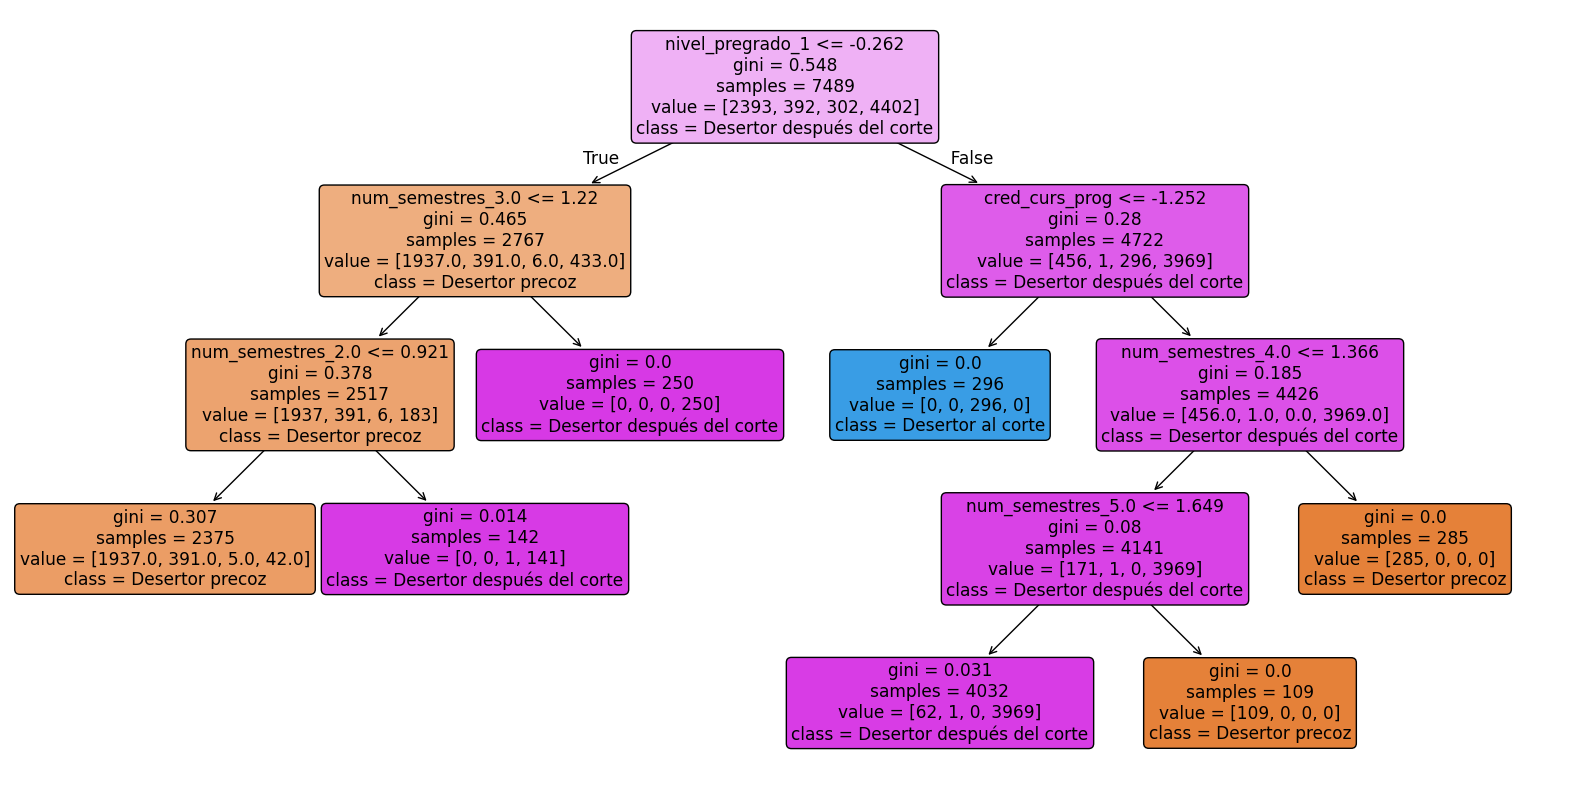

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenamiento con modelo optimizado
clf =  r1.best_estimator_
clf.fit(X_train, y_train)

# Plot
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['Desertor precoz', 'Desertor temprano', 'Desertor al corte', 'Desertor después del corte'], rounded=True) # Replace with your feature names and class names
plt.show()

#Conclusiones y resultados

**Desempeño de la red neuronal con mejores resultados**

<p align="justify"> En este caso se puede identificar que la red neuronal con regularizacion L2 presenta una buena precisión y alta consistencia, alcanzando un muy buen accuracy de aproximadamente 98.50% al ejecutar todos los epochs, con una función de pérdida que disminuye de manera sostenida con el entrenamiento.


**Desempeño de los modelos de árboles de decisión**

<p align="justify"> En este caso se obtuvo un accuracy significativamente más bajo (en test de 93% y en validación de 94%), comparado con todos los modelos de redes neuronales. Esto significa que, a pesar de que los árboles de decisión son modelos relativamente robustos, tienen limitaciones en entender patrones complejos.


**Comparación**

<p align="justify"> En el caso de las redes neuronales, la regularización L2 penaliza los pesos más grandes entre las conexiones neuronales. Esto permite obtener una solución más simple y un modelo mejor generalizado. En este problema de clasificación, la regularización L2 es particularmente útil para evitar el sobreajuste y mejorar la capacidad del modelo de generalizar a datos nuevos.

<p align="justify"> Además, las redes neuronales tienen una notable capacidad para capturar relaciones no lineales y complejas en los datos. Esto las hace especialmente efectivas en este problema de clasificación, donde las características de la base de datos están diseñadas para predecir la deserción estudiantil. Dado el elevado número de variables, es común que exista cierto nivel de ruido en los datos, lo cual puede dificultar la interpretación y el análisis. Las redes neuronales, al procesar los datos con mayor detalle, son más aptas para manejar este ruido en comparación con algoritmos de aprendizaje más simples, como los árboles de decisión. Si bien los árboles de decisión son intuitivos y fáciles de interpretar, su desempeño puede verse afectado cuando las relaciones entre las variables son ruidosas o complejas. Por esta razón, las redes neuronales son una elección más adecuada en este caso.


**Implementación de redes neuronales en problemas de deserción académica**

<p align="justify"> El uso de redes neuronales puede proporcionar a la Universidad de Antioquia una herramienta predictiva valiosa para mejorar la retención estudiantil. Implementar estos modelos en la toma de decisiones permitiría a la universidad diseñar políticas más específicas, asignar recursos de manera más efectiva y priorizar intervenciones en los grupos estudiantiles con mayor riesgo de deserción. Esto no solamente beneficiará a la Universidad de Antioquia, sino que también puede servir como modelo para otras instituciones educativas (IES). La predicción precisa y oportuna de la deserción puede contribuir al desarrollo de un sistema educativo más equitativo y eficiente, promoviendo la permanencia de los estudiantes y, en última instancia, reduciendo las tasas de abandono escolar en Colombia.